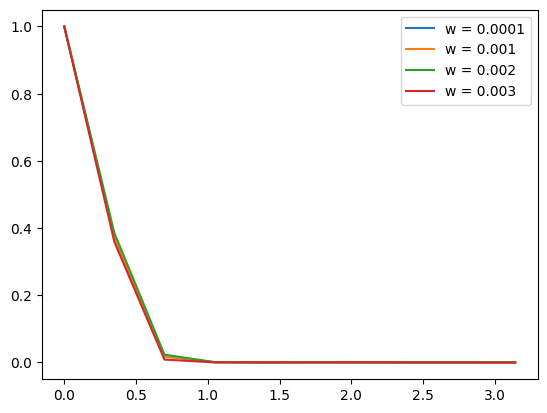

In [1]:
from functions import calk_noisy_pk
from matplotlib import pyplot as plt
import numpy as np

ks = np.linspace(0, np.pi, 10)
tau = 10
dt = 0.01
for w in [0.0001, 0.001, 0.002, 0.003]:
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=np.arange(0, tau, dt).shape)
    pks = calk_noisy_pk(ks, tau, noise)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

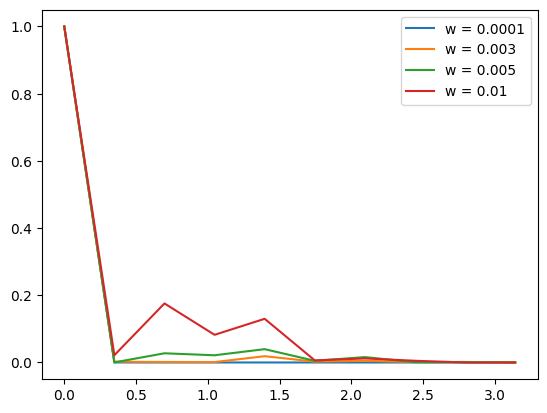

In [2]:
from functions import calk_noisy_pk
from matplotlib import pyplot as plt
import numpy as np

ks = np.linspace(0, np.pi, 10)
tau = 100
dt = 0.01
for w in [0.0001, 0.003, 0.005, 0.01]:
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=np.arange(0, tau, dt).shape)
    pks = calk_noisy_pk(ks, tau, noise)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

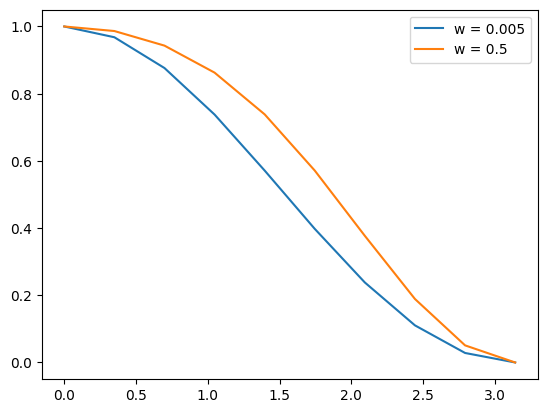

In [12]:
from functions import calk_noisy_pk
from matplotlib import pyplot as plt
import numpy as np

ks = np.linspace(0, np.pi, 10)
tau = 0.21
dt = 0.01
for w in [0.005, 0.5]:
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=np.arange(0, tau, dt).shape)
    pks = calk_noisy_pk(ks, tau, noise)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

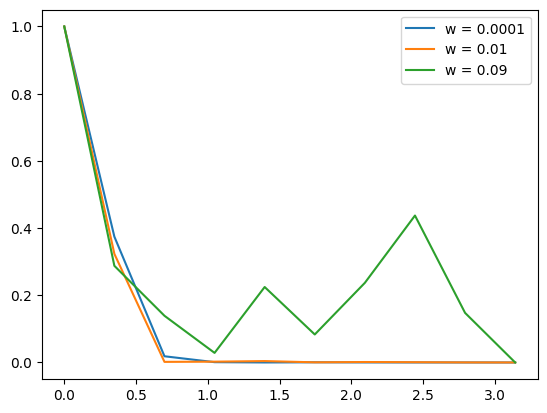

In [45]:
from functions import calk_noisy_pk
from matplotlib import pyplot as plt
import numpy as np

ks = np.linspace(0, np.pi, 10)
tau = 10
dt = 0.01
for w in [ 0.0001, 0.01, 0.09]:
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=np.arange(0, tau, dt).shape)
    pks = calk_noisy_pk(ks, tau, noise)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

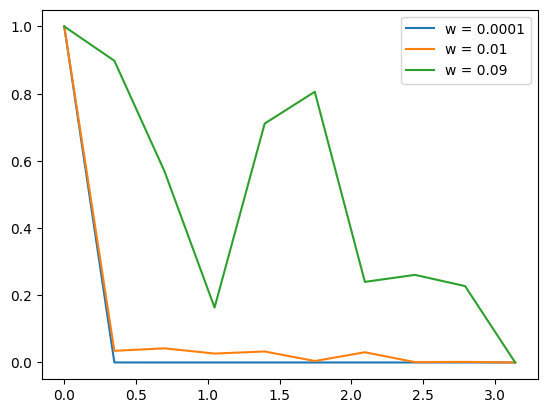

In [47]:
from functions import calk_noisy_pk
from matplotlib import pyplot as plt
import numpy as np

ks = np.linspace(0, np.pi, 10)
tau = 100
dt = 0.01
for w in [ 0.0001, 0.01, 0.09]:
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=np.arange(0, tau, dt).shape)
    pks = calk_noisy_pk(ks, tau, noise)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

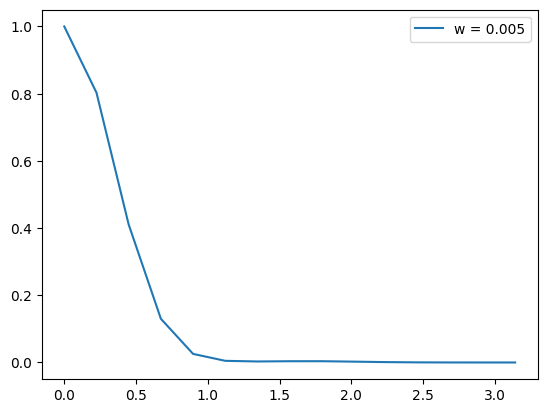

In [17]:
from functions import calk_noisy_pk
from matplotlib import pyplot as plt
import numpy as np

ks = np.linspace(0, np.pi, 15)
tau = 5
dt = 0.01
for w in [0.005]:
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=np.arange(0, tau, dt).shape)
    pks = calk_noisy_pk(ks, tau, noise)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

NameError: name 'cos_squared' is not defined

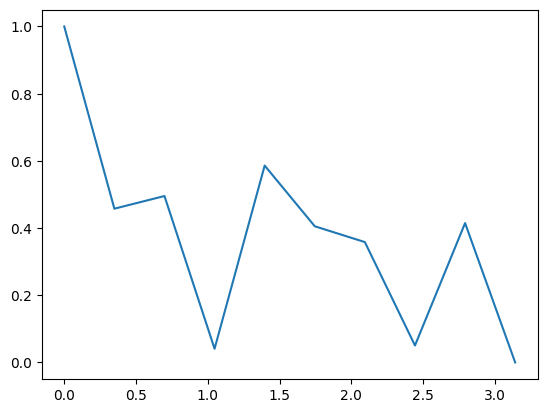

In [4]:
# Plotting
plt.plot(ks, avg_pks, label=f'w = {w} (Noise)')
plt.plot(ks, cos_squared, label=r'$\cos^2(k/2)$', linestyle='--', color='red')  # Adding the cos^2(k/2) plot
plt.legend()
plt.title('Average Plot of Noisy Signals with Cos^2(k/2)')
plt.xlabel('k values')
plt.ylabel('Processed k values')
plt.grid(True)
plt.show()

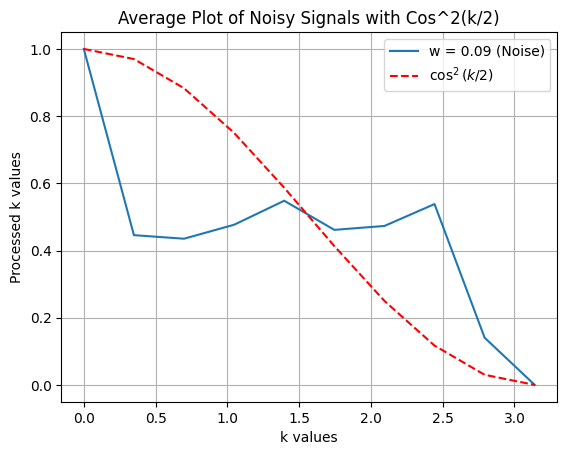

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import os

# Assuming the function 'calk_noisy_pk' is properly defined in the imported module
from functions import calk_noisy_pk

def simulate_noise_and_compute(ks, tau, dt, w):
    """
    Simulate the noise and compute the pks for one run.
    """
    # Set the nice value of the process
    os.nice(1)
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=int(tau / dt))
    return calk_noisy_pk(ks, tau, noise)

# Parameters
ks = np.linspace(0, np.pi, 10)  # k values
tau = 50  # Total time
dt = 0.01  # Time step
num_simulations = 1000  # Number of simulations to average
w = 0.09  # Strength of the noise

# Use ProcessPoolExecutor to parallelize the simulations
with ProcessPoolExecutor() as executor:
    results = list(executor.map(simulate_noise_and_compute, [ks]*num_simulations, [tau]*num_simulations, [dt]*num_simulations, [w]*num_simulations))

# Calculate average
avg_pks = np.mean(results, axis=0)

# Calculate cos^2(k/2)
cos_squared = np.cos(ks/2)**2

# Plotting
plt.plot(ks, avg_pks, label=f'w = {w} (Noise)')
plt.plot(ks, cos_squared, label=r'$\cos^2(k/2)$', linestyle='--', color='red')  # Adding the cos^2(k/2) plot
plt.legend()
plt.title('Average Plot of Noisy Signals with $Cos^2(k/2)$')
plt.xlabel('k values')
plt.ylabel('Processed k values')
plt.grid(True)
plt.show()


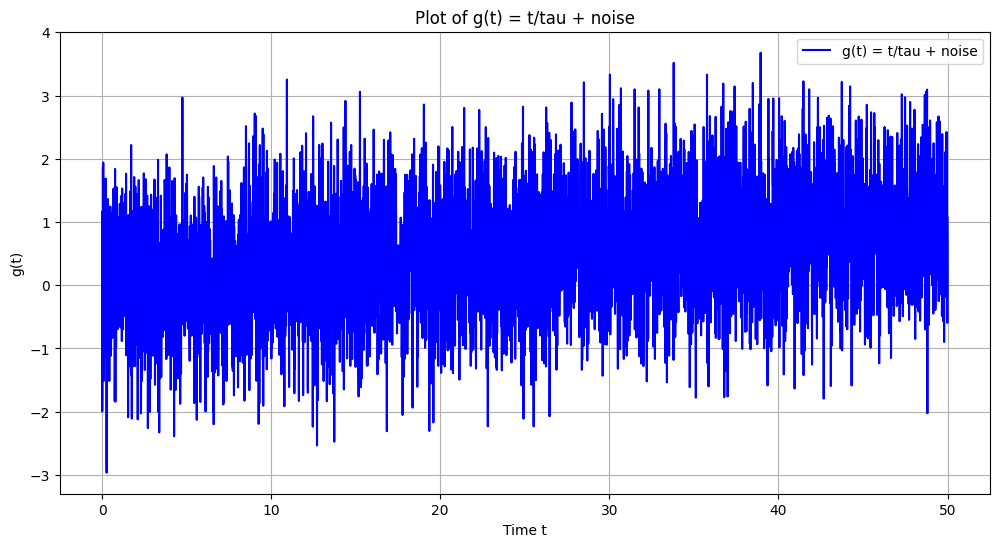

In [6]:
# Set the parameters based on calculation
dt = 0.01
W = 0.09  # W calculated as sqrt(W^2)
tau = 50  # Total time for normalization

# Generate noise
num_samples = int(tau / dt)
noise_samples = np.random.normal(0, np.sqrt(W**2 / dt), num_samples)

# Define the function g(t) = t/tau + noise
def g_function(t, tau, noise_samples):
    return t / tau + noise_samples

# Parameters

t_values = np.linspace(0, tau, num_samples)  # Time values from 0 to tau

# Compute g(t) values
g_values = g_function(t_values, tau, noise_samples)

# Plot g(t)
plt.figure(figsize=(12, 6))
plt.plot(t_values, g_values, label='g(t) = t/tau + noise', color='blue')
plt.title('Plot of g(t) = t/tau + noise')
plt.xlabel('Time t')
plt.ylabel('g(t)')
plt.grid(True)
plt.legend()
plt.show()

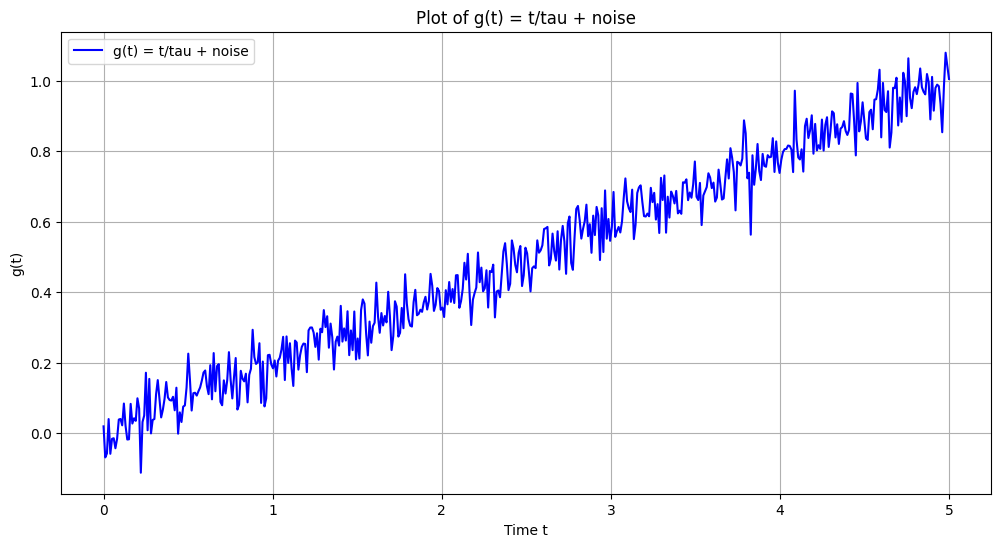

In [12]:
import numpy as np
from matplotlib import pyplot as plt

# Set the parameters based on calculation
dt = 0.01
W = 0.005  # W calculated as sqrt(W^2)
tau = 5  # Total time for normalization

# Generate noise
num_samples = int(tau / dt)
noise_samples = np.random.normal(0, np.sqrt(W**2 / dt), num_samples)

# Define the function g(t) = t/tau + noise
def g_function(t, tau, noise_samples):
    return t / tau + noise_samples

# Parameters

t_values = np.linspace(0, tau, num_samples)  # Time values from 0 to tau

# Compute g(t) values
g_values = g_function(t_values, tau, noise_samples)

# Plot g(t)
plt.figure(figsize=(12, 6))
plt.plot(t_values, g_values, label='g(t) = t/tau + noise', color='blue')
plt.title('Plot of g(t) = t/tau + noise')
plt.xlabel('Time t')
plt.ylabel('g(t)')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
# Example of usage in a simulation loop
for t, gamma_t in zip(np.arange(0, tau, dt), noise):
    # Here, gamma_t is the noise at time t
    # You can use gamma_t to modify the Hamiltonian or other parts of your simulation
    print(f"Time: {t}, Noise: {gamma_t}")


Time: 0.0, Noise: 0.15243736088624835
Time: 0.001, Noise: -0.052793369668114806
Time: 0.002, Noise: 0.23328469816586853
Time: 0.003, Noise: -0.19680823731958277
Time: 0.004, Noise: -0.27568785175098187
Time: 0.005, Noise: -0.09379819848553268
Time: 0.006, Noise: -0.1204275178315304
Time: 0.007, Noise: 0.36550170890440126
Time: 0.008, Noise: 0.056429046048823865
Time: 0.009000000000000001, Noise: 0.3895323722699358
Time: 0.01, Noise: 0.1817349386614914
Time: 0.011, Noise: -0.014770524812039911
Time: 0.012, Noise: -0.04973068603287147
Time: 0.013000000000000001, Noise: 0.20578071849494795
Time: 0.014, Noise: -0.05693386617675061
Time: 0.015, Noise: 0.5484555051222161
Time: 0.016, Noise: -0.1367404888509531
Time: 0.017, Noise: 0.26105870519283164
Time: 0.018000000000000002, Noise: 0.39948318441213626
Time: 0.019, Noise: -0.2826760909528199
Time: 0.02, Noise: 0.22947872158736995
Time: 0.021, Noise: -0.033733823109753286
Time: 0.022, Noise: 0.028643416303618708
Time: 0.023, Noise: 0.0045183

In [21]:
import numpy as np
from scipy.integrate import solve_ivp

# Constants
dt = 0.01  # Time step
T = 1.0    # Total time
W = 0.1    # Strength of the noise
time_steps = np.arange(0, T, dt)

# Generate white noise array
noise_array = np.random.normal(0, np.sqrt(W**2 / dt), size=time_steps.shape)

# Define other functions and operators
def V_func(k):
    sigZ = np.array([[1, 0], [0, -1]])
    sigX = np.array([[0, 1], [1, 0]])
    v_x = 2 * np.sin(k)
    v_z = -2 * (np.cos(k) + 1)
    return v_z * sigZ + v_x * sigX

def H0(t, tau, k):
    g_t = t / tau
    cos_k = np.cos(k)
    sin_k = np.sin(k)
    A_k = np.array([[1 - g_t - g_t * cos_k, g_t * sin_k],
                    [g_t * sin_k, -(1 - g_t - g_t * cos_k)]])
    return 2 * A_k

def commutator(A, B):
    return np.dot(A, B) - np.dot(B, A)

def rho_dt(t, y, tau, k, noise_idx):
    rho = y.reshape(2, 2)
    H = H0(t, tau, k) + noise_array[noise_idx] * V_func(k)  # Using noise from the noise array
    U = -1j * commutator(H, rho)
    rho_dot = U.flatten()
    return rho_dot

# Parameters for the solve_ivp function
k = np.pi / 4  # Example k value
tau = 1.0      # Example tau value
rho_initial = np.array([[0, 0], [0, 1]], dtype=complex).flatten()

# Solve the Schrödinger equation using solve_ivp
sol = solve_ivp(rho_dt, (0, T), rho_initial, args=(tau, k, 0), t_eval=time_steps, method='RK45', vectorized=True)

# Print the solution at each time step
for idx, time_point in enumerate(sol.t):
    print(f"Time {time_point:.2f}, Density matrix:\n{sol.y[:, idx].reshape(2, 2)}\n")


Time 0.00, Density matrix:
[[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Time 0.01, Density matrix:
[[8.07371990e-04+0.j         2.51706309e-03+0.02829335j]
 [2.51706309e-03-0.02829335j 9.99192628e-01+0.j        ]]

Time 0.02, Density matrix:
[[0.00318604+0.j         0.00994027+0.05547273j]
 [0.00994027-0.05547273j 0.99681396+0.j        ]]

Time 0.03, Density matrix:
[[0.00703155+0.j         0.02195437+0.08062428j]
 [0.02195437-0.08062428j 0.99296845+0.j        ]]

Time 0.04, Density matrix:
[[0.01218976+0.j         0.03808782+0.10293355j]
 [0.03808782-0.10293355j 0.98781024+0.j        ]]

Time 0.05, Density matrix:
[[0.0184683 +0.j         0.05774807+0.12165974j]
 [0.05774807-0.12165974j 0.9815317 +0.j        ]]

Time 0.06, Density matrix:
[[0.0256449 +0.j         0.08024661+0.13621123j]
 [0.08024661-0.13621123j 0.9743551 +0.j        ]]

Time 0.07, Density matrix:
[[0.03346819+0.j         0.10480117+0.14616612j]
 [0.10480117-0.14616612j 0.96653181+0.j        ]]

Time 0.08, Density matrix:
[[0.0

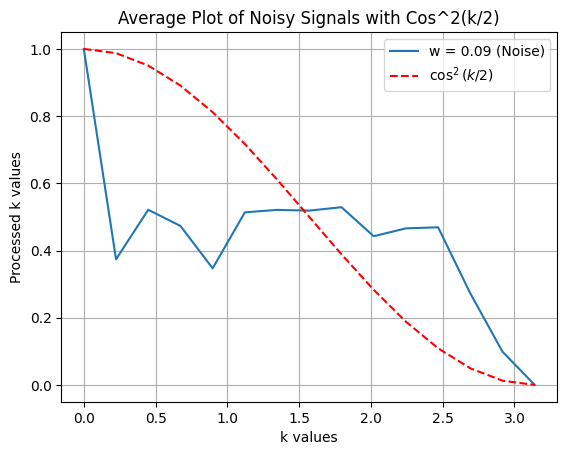

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import os

# Assuming the function 'calk_noisy_pk' is properly defined in the imported module
from functions import calk_noisy_pk

def simulate_noise_and_compute(ks, tau, dt, w):
    """
    Simulate the noise and compute the pks for one run.
    """
    # Set the nice value of the process
    os.nice(1)
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=int(tau / dt))
    return calk_noisy_pk(ks, tau, noise)

# Parameters
ks = np.linspace(0, np.pi, 15)  # k values
tau = 50  # Total time
dt = 0.01  # Time step
num_simulations = 2000  # Number of simulations to average
w = 0.09  # Strength of the noise

# Use ProcessPoolExecutor to parallelize the simulations
with ProcessPoolExecutor() as executor:
    results = list(executor.map(simulate_noise_and_compute, [ks]*num_simulations, [tau]*num_simulations, [dt]*num_simulations, [w]*num_simulations))

# Calculate average
avg_pks = np.mean(results, axis=0)

# Calculate cos^2(k/2)
cos_squared = np.cos(ks/2)**2

# Plotting
plt.plot(ks, avg_pks, label=f'w = {w} (Noise)')
plt.plot(ks, cos_squared, label=r'$\cos^2(k/2)$', linestyle='--', color='red')  # Adding the cos^2(k/2) plot
plt.legend()
plt.title('Average Plot of Noisy Signals with Cos^2(k/2)')
plt.xlabel('k values')
plt.ylabel('Processed k values')
plt.grid(True)
plt.show()


In [24]:
import sympy as sp

# Define the symbol k, assuming it is a real number
k = sp.symbols('k', real=True)

# Define the matrix V
V = sp.Matrix([
    [-1 - sp.cos(k), sp.sin(k)],
    [sp.sin(k), 1 + sp.cos(k)]
])

# Compute the transpose of V (since entries are real, transpose = conjugate transpose)
V_dagger = V.transpose()

# Define the matrix rho as a generic 2x2 matrix with symbolic entries
rho_11, rho_12, rho_21, rho_22 = sp.symbols('rho_11 rho_12 rho_21 rho_22')
rho = sp.Matrix([
    [rho_11, rho_12],
    [rho_21, rho_22]
])

# Compute V @ rho @ V_dagger
term1 = V @ rho @ V_dagger

# Compute rho @ V_dagger @ V
term2 = rho @ V_dagger @ V

# Compute V_dagger @ V @ rho
term3 = V_dagger @ V @ rho

# Calculate the final expression
expression = term1 - 0.5 * term2 - 0.5 * term3

# Create equations for each element being zero
equations = [sp.Eq(expression[i, j], 0) for i in range(2) for j in range(2)]

# Solve the equations
solution = sp.solve(equations, (rho_11, rho_12, rho_21, rho_22))

# Display the solutions
solution[rho_11]


rho_21*(-2.0*cos(k)/sin(k) - 2.0/sin(k)) + rho_22

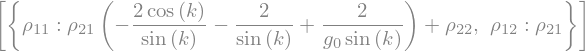

In [28]:
import sympy as sp

# Define the symbols k and g_0, assuming both are real numbers
k, g_0 = sp.symbols('k g_0', real=True)

# Define the matrix H
H = sp.Matrix([
    [1 - g_0 - g_0 * sp.cos(k), g_0 * sp.sin(k)],
    [g_0 * sp.sin(k), -(1 - g_0 - g_0 * sp.cos(k))]
])

# Define the matrix rho as a generic 2x2 matrix with symbolic entries
rho_11, rho_12, rho_21, rho_22 = sp.symbols('rho_11 rho_12 rho_21 rho_22')
rho = sp.Matrix([
    [rho_11, rho_12],
    [rho_21, rho_22]
])

# Compute the commutator [H, rho] = H * rho - rho * H
commutator = H * rho - rho * H

# Create equations for each element being zero
equations = [sp.Eq(commutator[i, j], 0) for i in range(2) for j in range(2)]

# Solve the equations
solution = sp.solve(equations, (rho_11, rho_12, rho_21, rho_22), dict=True)

solution


In [3]:
import numpy as np
import time
from qiskit import QuantumCircuit, transpile
from qiskit_aer.noise import NoiseModel
from qiskit_aer import AerSimulator
from collections import defaultdict
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer.noise.errors import amplitude_damping_error, phase_damping_error, depolarizing_error

def generate_tfim_circuits(qubits, steps_list, num_circuits_per_step, angle_noise=0.0):
    start_time = time.time()
    
    circuits = []
    for steps in steps_list:
        base_angles = (np.pi/2) * np.arange(1, steps+1) / (steps+1)
        alphas = -np.cos(base_angles)
        betas = -np.sin(base_angles)
        
        noisy_alphas = np.outer(alphas, np.ones(num_circuits_per_step)) + angle_noise * np.random.randn(steps, num_circuits_per_step)
        
        for circuit_idx in range(num_circuits_per_step):
            circuit = QuantumCircuit(qubits, qubits)
            circuit.h(range(qubits))
            
            for step in range(steps):
                beta = betas[step]
                circuit.rz(beta, range(qubits))
                
                for i in range(qubits):
                    j = (i + 1) % qubits
                    circuit.cp(-2 * beta, i, j)
                    circuit.rx(noisy_alphas[step, circuit_idx], i)

            circuit.measure(range(qubits), range(qubits))
            circuits.append(circuit)
    
    print("Circuit generation time: {:.4f} seconds".format(time.time() - start_time))
    return circuits

def simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping=0.0, dephazing=0.0, depolarizing=0.0, angle_noise=0.0):
    circuits = generate_tfim_circuits(qubits, steps_list, num_circuits_per_step, angle_noise)

    start_time = time.time()
    # Noise Model
    noise_model = NoiseModel()
    if damping > 0:
        noise_model.add_all_qubit_quantum_error(amplitude_damping_error(damping), ['rx', 'rz'])
    if dephazing > 0:
        noise_model.add_all_qubit_quantum_error(phase_damping_error(dephazing), ['rx', 'rz'])
    if depolarizing > 0:
        noise_model.add_all_qubit_quantum_error(depolarizing_error(depolarizing, 1), ['h', 'rx', 'rz'])
        noise_model.add_all_qubit_quantum_error(depolarizing_error(depolarizing, 2), ['cp'])
    print("Noise model setup time: {:.4f} seconds".format(time.time() - start_time))
    
    start_time = time.time()
    # Simulation
    simulator = AerSimulator(noise_model=noise_model)
    transpiled_circuits = transpile(circuits, simulator)
    print("Transpilation time: {:.4f} seconds".format(time.time() - start_time))
    
    start_time = time.time()
    results = simulator.run(transpiled_circuits, shots=numshots).result().get_counts()
    print("Simulation time: {:.4f} seconds".format(time.time() - start_time))
    
    # Ensure results is a list even if it's a single dictionary
    if isinstance(results, dict):
        results = [results]
    
    # Aggregation of results by number of steps
    start_time = time.time()
    counts_by_steps = {steps: defaultdict(int) for steps in steps_list}
    circuit_index = 0
    for steps in steps_list:
        for _ in range(num_circuits_per_step):
            for key, value in results[circuit_index].items():
                counts_by_steps[steps][key] += value
            circuit_index += 1
    print("Results aggregation time: {:.4f} seconds".format(time.time() - start_time))
    
    # Convert defaultdict to dict
    counts_by_steps = {steps: dict(counts) for steps, counts in counts_by_steps.items()}
    
    return counts_by_steps

def count_kinks(bitstring):
    return sum(1 for i in range(len(bitstring)) if bitstring[i] != bitstring[i-1])

def calc_kinks_probability(counts):
    kinks_count = defaultdict(int)
    for bitstring, count in counts.items():
        kinks_count[count_kinks(bitstring)] += count

    # Normalize the counts to get probabilities
    numshots = sum(kinks_count.values())
    kinks_probability = {k: v/numshots for k, v in kinks_count.items()}
    return kinks_probability

def calc_kinks_mean(kinks_probability):
    total_kinks = sum(k * v for k, v in kinks_probability.items())
    return total_kinks

def calc_kinks_variance(kinks_probability):
    mean_kinks = calc_kinks_mean(kinks_probability)
    total_variance = sum((k - mean_kinks)**2 * v for k, v in kinks_probability.items())
    return total_variance


In [8]:
## 13.10.24
qubits = 8
steps_list = [i for i in range(0, 26)]
num_circuits_per_step = 100
numshots = 100
damping = 0
dephazing = 0.12
depolarizing = 0
angle_noise = 0

# Generate and simulate the TFIM circuits
results1842 = simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping, dephazing, depolarizing, angle_noise)

Circuit generation time: 16.8364 seconds
Noise model setup time: 0.0023 seconds
Transpilation time: 20.6332 seconds
Simulation time: 60.7325 seconds
Results aggregation time: 0.0288 seconds


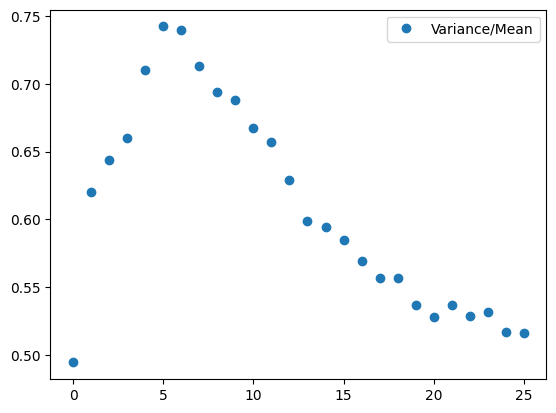

In [9]:
# plot the variance/mean ratio for each step, add title and labels
probs = {s: calc_kinks_probability(d) for s, d in results1842.items()}
means =  {s: calc_kinks_mean(d) for s, d in probs.items()}
variances = {s: calc_kinks_variance(d) for s, d in probs.items()}
ratios = {s: calc_kinks_variance(d)/calc_kinks_mean(d) for s, d in probs.items()}
#plt.plot(variances.keys(), variances.values(), 'o', label='Variance')
#plt.plot(means.keys(), means.values(), 'o', label='Mean')
plt.plot(ratios.keys(), ratios.values(), 'o', label='Variance/Mean')
plt.legend()

In [ ]:
## 27.10.24
qubits = 8
steps_list = [i for i in range(0, 51)]
num_circuits_per_step = 50
numshots = 200
damping = 0
dephazing = 0.04
depolarizing = 0
angle_noise = 0

# Generate and simulate the TFIM circuits
results_noisy = simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping, dephazing, depolarizing, angle_noise)


Circuit generation time: 28.0407 seconds
Noise model setup time: 0.0596 seconds
Transpilation time: 33.1138 seconds
Simulation time: 129.2716 seconds
Results aggregation time: 0.0334 seconds


In [11]:
## 04/11/24
qubits = 8
steps_list = [i for i in range(0, 51)]
num_circuits_per_step = 50
numshots = 200
damping = 0
dephazing = 0.02
depolarizing = 0
angle_noise = 0

# Generate and simulate the TFIM circuits
results_noisy_02 = simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping, dephazing, depolarizing, angle_noise)



Circuit generation time: 28.2675 seconds
Noise model setup time: 0.0022 seconds
Transpilation time: 39.0049 seconds
Simulation time: 138.5642 seconds
Results aggregation time: 0.0264 seconds


In [17]:
## 04/11/24
qubits = 8
steps_list = [i for i in range(0, 31)]
num_circuits_per_step = 50
numshots = 200
damping = 0
dephazing = 0.01
depolarizing = 0
angle_noise = 0

# Generate and simulate the TFIM circuits
results_noisy_01 = simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping, dephazing, depolarizing, angle_noise)

Circuit generation time: 9.5542 seconds
Noise model setup time: 0.0029 seconds
Transpilation time: 20.6464 seconds
Simulation time: 52.8247 seconds
Results aggregation time: 0.0101 seconds


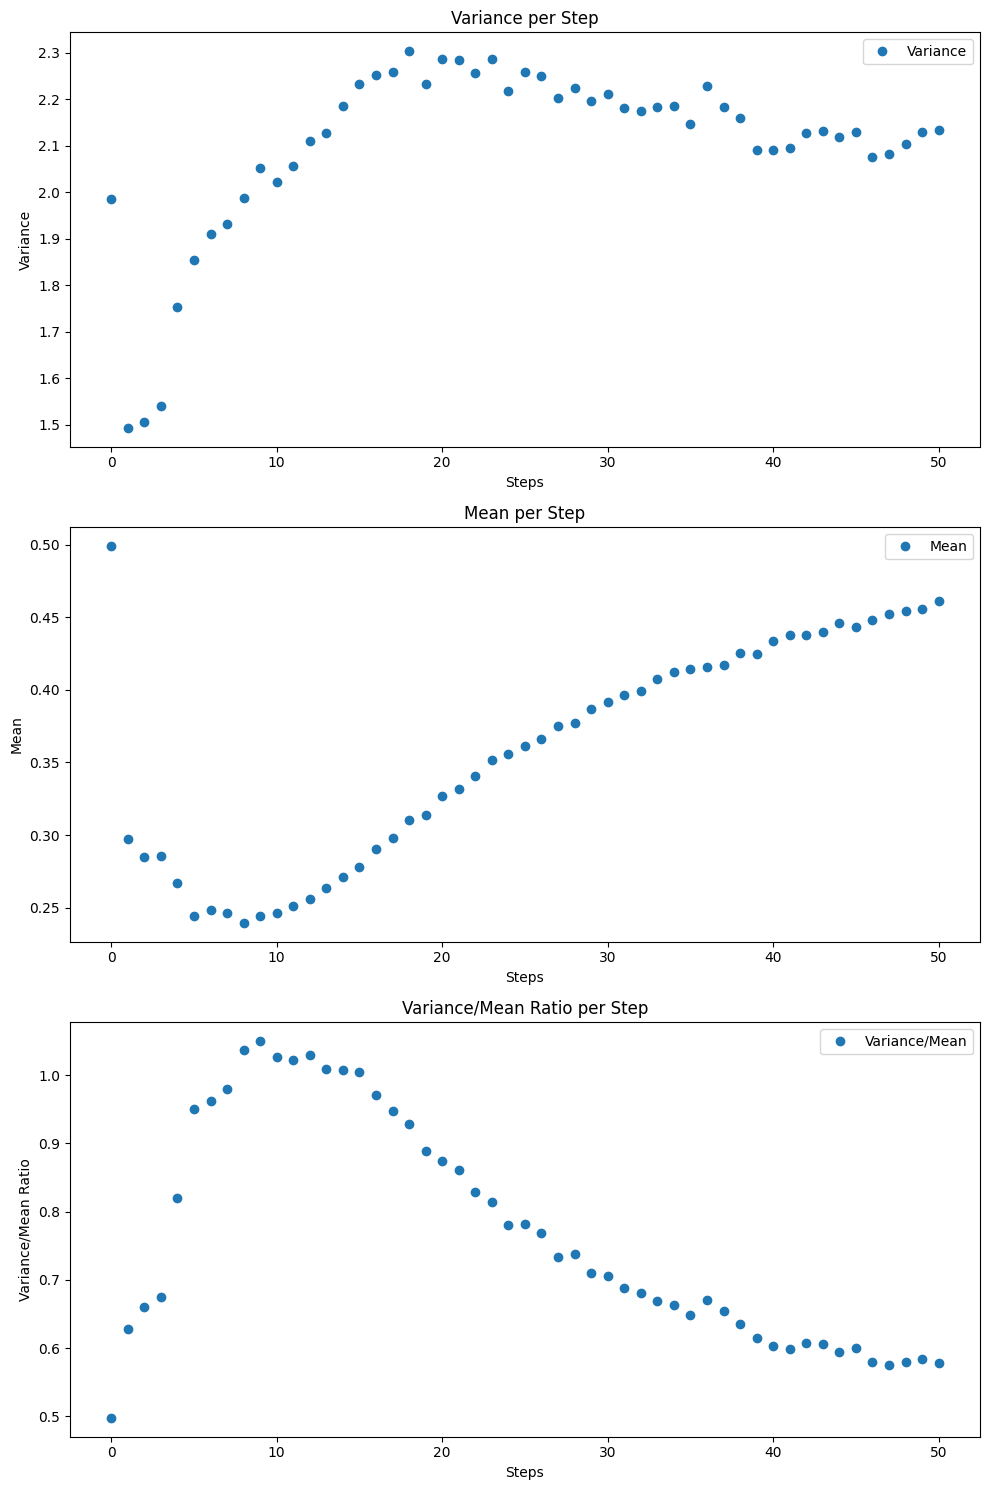

In [19]:
# Calculate probabilities, means, variances, and ratios
probs = {s: calc_kinks_probability(d) for s, d in results1349.items()}
means = {s: calc_kinks_mean(d) for s, d in probs.items()}
variances = {s: calc_kinks_variance(d) for s, d in probs.items()}
ratios = {s: variances[s] / means[s] for s in probs.keys()}

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot Variance
axs[0].plot(variances.keys(), variances.values(), 'o', label='Variance')
axs[0].set_title('Variance per Step')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Variance')
axs[0].legend()

# Plot Mean
axs[1].plot(means.keys(), np.array(list(means.values())) / qubits, 'o', label='Mean')
axs[1].set_title('Mean per Step')
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Mean')
axs[1].legend()

# Plot Variance/Mean Ratio
axs[2].plot(ratios.keys(), ratios.values(), 'o', label='Variance/Mean')
axs[2].set_title('Variance/Mean Ratio per Step')
axs[2].set_xlabel('Steps')
axs[2].set_ylabel('Variance/Mean Ratio')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

28.10.24

$\rho_p(\tau)=f(\tau) \rho(\tau) + \left(1 - f(\tau)\right) \frac{1}{2^n} I$

for $f(t) =$  :
1.  $e^{-\gamma t}$



In [8]:
## 30.10.24
qubits = 8
steps_list = [i for i in range(0, 51)]
num_circuits_per_step = 1
numshots = 100000
damping = 0
dephazing = 0
depolarizing = 0
angle_noise = 0

# Generate and simulate the TFIM circuits
results_sim = simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping, dephazing, depolarizing, angle_noise)

Circuit generation time: 5.4984 seconds
Noise model setup time: 0.0000 seconds
Transpilation time: 3.0064 seconds
Simulation time: 7.4029 seconds
Results aggregation time: 0.0014 seconds


In [18]:
## 30.10.24
qubits = 8
steps_list = [i for i in range(0, 31)]
num_circuits_per_step = 1
numshots = 100000
damping = 0
dephazing = 0
depolarizing = 0
angle_noise = 0

# Generate and simulate the TFIM circuits
results_sim1 = simulate_tfim_circuits(qubits, numshots, steps_list, num_circuits_per_step, damping, dephazing, depolarizing, angle_noise)

Circuit generation time: 0.1939 seconds
Noise model setup time: 0.0000 seconds
Transpilation time: 3.0225 seconds
Simulation time: 3.8408 seconds
Results aggregation time: 0.0008 seconds


In [31]:
def generate_random_bitstrings(quantity, length):
    # Vectorize bitstring generation using NumPy
    random_bits = np.random.choice(['0', '1'], size=(quantity, length))
    bitstrings = [''.join(bits) for bits in random_bits]
    return bitstrings

gamma = 0.31
exponential_decay = lambda steps, gamma: np.exp(-gamma * steps)
ed = exponential_decay(26, gamma)
random_strings_num = int(numshots * (ed**-1 - 1))

for steps, counts in results1738.items():
    ed = exponential_decay(steps, gamma)
    random_strings_num = int(numshots * (ed**-1 - 1))
    random_strings = generate_random_bitstrings(random_strings_num, qubits)
    for bitstring in random_strings:
        counts[bitstring] = counts.get(bitstring, 1) + 1

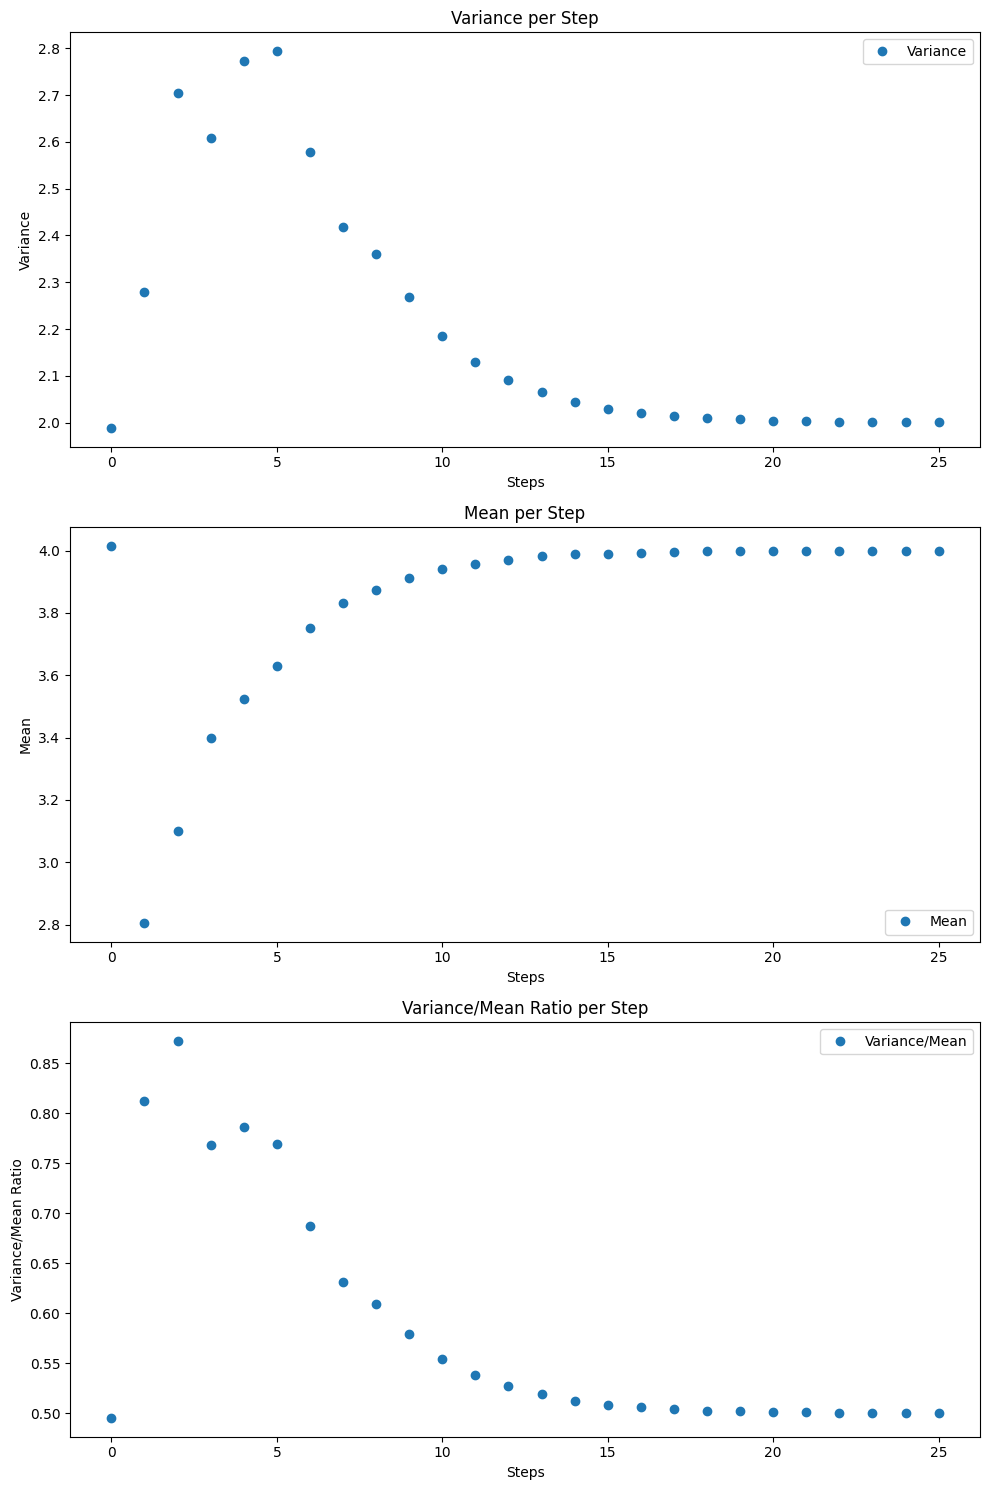

In [16]:
# Calculate probabilities, means, variances, and ratios
probs = {s: calc_kinks_probability(d) for s, d in results1435.items()}
means = {s: calc_kinks_mean(d) for s, d in probs.items()}
variances = {s: calc_kinks_variance(d) for s, d in probs.items()}
ratios = {s: variances[s] / means[s] for s in probs.keys()}

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot Variance
axs[0].plot(variances.keys(), variances.values(), 'o', label='Variance')
axs[0].set_title('Variance per Step')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Variance')
axs[0].legend()

# Plot Mean
axs[1].plot(means.keys(), means.values(), 'o', label='Mean')
axs[1].set_title('Mean per Step')
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Mean')
axs[1].legend()

# Plot Variance/Mean Ratio
axs[2].plot(ratios.keys(), ratios.values(), 'o', label='Variance/Mean')
axs[2].set_title('Variance/Mean Ratio per Step')
axs[2].set_xlabel('Steps')
axs[2].set_ylabel('Variance/Mean Ratio')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

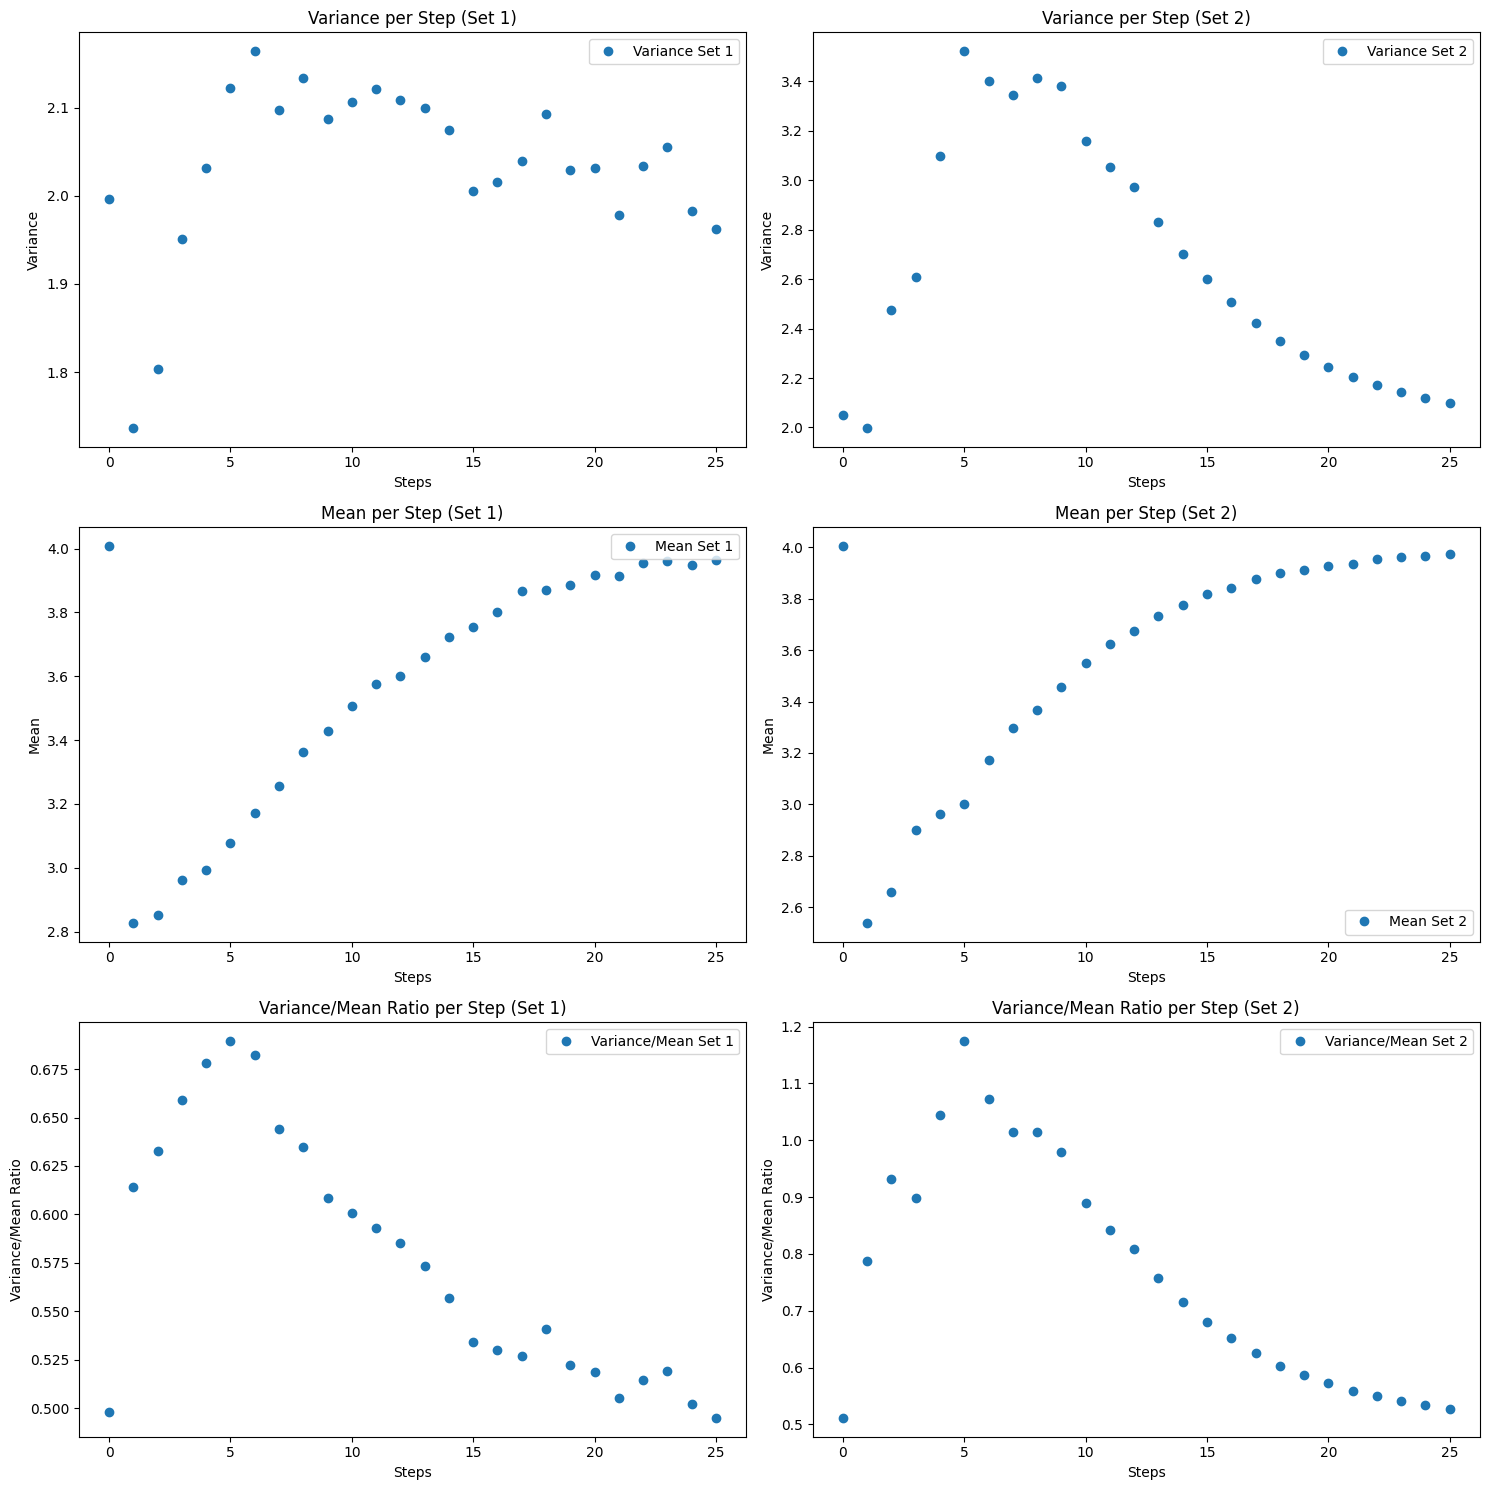

In [9]:
import matplotlib.pyplot as plt

# Assuming calc_kinks_probability, calc_kinks_mean, and calc_kinks_variance are defined elsewhere

# Calculate probabilities, means, variances, and ratios for the first set
probs1 = {s: calc_kinks_probability(d) for s, d in results1455.items()}
means1 = {s: calc_kinks_mean(d) for s, d in probs1.items()}
variances1 = {s: calc_kinks_variance(d) for s, d in probs1.items()}
ratios1 = {s: variances1[s] / means1[s] for s in probs1.keys()}

# Calculate probabilities, means, variances, and ratios for the second set
probs2 = {s: calc_kinks_probability(d) for s, d in results1255.items()}
means2 = {s: calc_kinks_mean(d) for s, d in probs2.items()}
variances2 = {s: calc_kinks_variance(d) for s, d in probs2.items()}
ratios2 = {s: variances2[s] / means2[s] for s in probs2.keys()}

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot Variance for the first set
axs[0, 0].plot(variances1.keys(), variances1.values(), 'o', label='Variance Set 1')
axs[0, 0].set_title('Variance per Step (Set 1)')
axs[0, 0].set_xlabel('Steps')
axs[0, 0].set_ylabel('Variance')
axs[0, 0].legend()

# Plot Variance for the second set
axs[0, 1].plot(variances2.keys(), variances2.values(), 'o', label='Variance Set 2')
axs[0, 1].set_title('Variance per Step (Set 2)')
axs[0, 1].set_xlabel('Steps')
axs[0, 1].set_ylabel('Variance')
axs[0, 1].legend()

# Plot Mean for the first set
axs[1, 0].plot(means1.keys(), means1.values(), 'o', label='Mean Set 1')
axs[1, 0].set_title('Mean per Step (Set 1)')
axs[1, 0].set_xlabel('Steps')
axs[1, 0].set_ylabel('Mean')
axs[1, 0].legend()

# Plot Mean for the second set
axs[1, 1].plot(means2.keys(), means2.values(), 'o', label='Mean Set 2')
axs[1, 1].set_title('Mean per Step (Set 2)')
axs[1, 1].set_xlabel('Steps')
axs[1, 1].set_ylabel('Mean')
axs[1, 1].legend()

# Plot Variance/Mean Ratio for the first set
axs[2, 0].plot(ratios1.keys(), ratios1.values(), 'o', label='Variance/Mean Set 1')
axs[2, 0].set_title('Variance/Mean Ratio per Step (Set 1)')
axs[2, 0].set_xlabel('Steps')
axs[2, 0].set_ylabel('Variance/Mean Ratio')
axs[2, 0].legend()

# Plot Variance/Mean Ratio for the second set
axs[2, 1].plot(ratios2.keys(), ratios2.values(), 'o', label='Variance/Mean Set 2')
axs[2, 1].set_title('Variance/Mean Ratio per Step (Set 2)')
axs[2, 1].set_xlabel('Steps')
axs[2, 1].set_ylabel('Variance/Mean Ratio')
axs[2, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

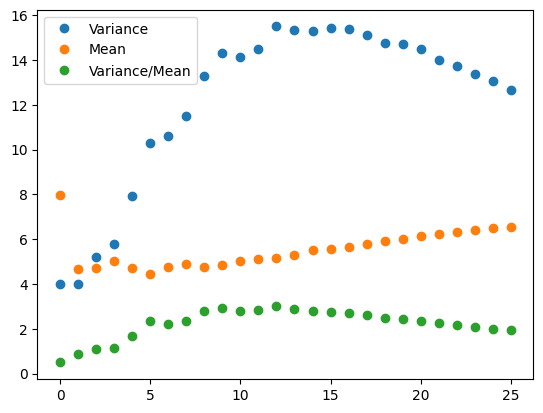

In [21]:
# plot the variance/mean ratio for each step, add title and labels
probs = {steps: calc_kinks_probability(counts_dict) for steps, counts_dict in results1209.items()}
means =  {s: calc_kinks_mean(d) for s, d in probs.items()}
variances = {s: calc_kinks_variance(d) for s, d in probs.items()}
ratios = {s: calc_kinks_variance(d)/calc_kinks_mean(d) for s, d in probs.items()}
plt.plot(variances.keys(), variances.values(), 'o', label='Variance')
plt.plot(means.keys(), means.values(), 'o', label='Mean')
plt.plot(ratios.keys(), ratios.values(), 'o', label='Variance/Mean')
plt.legend()

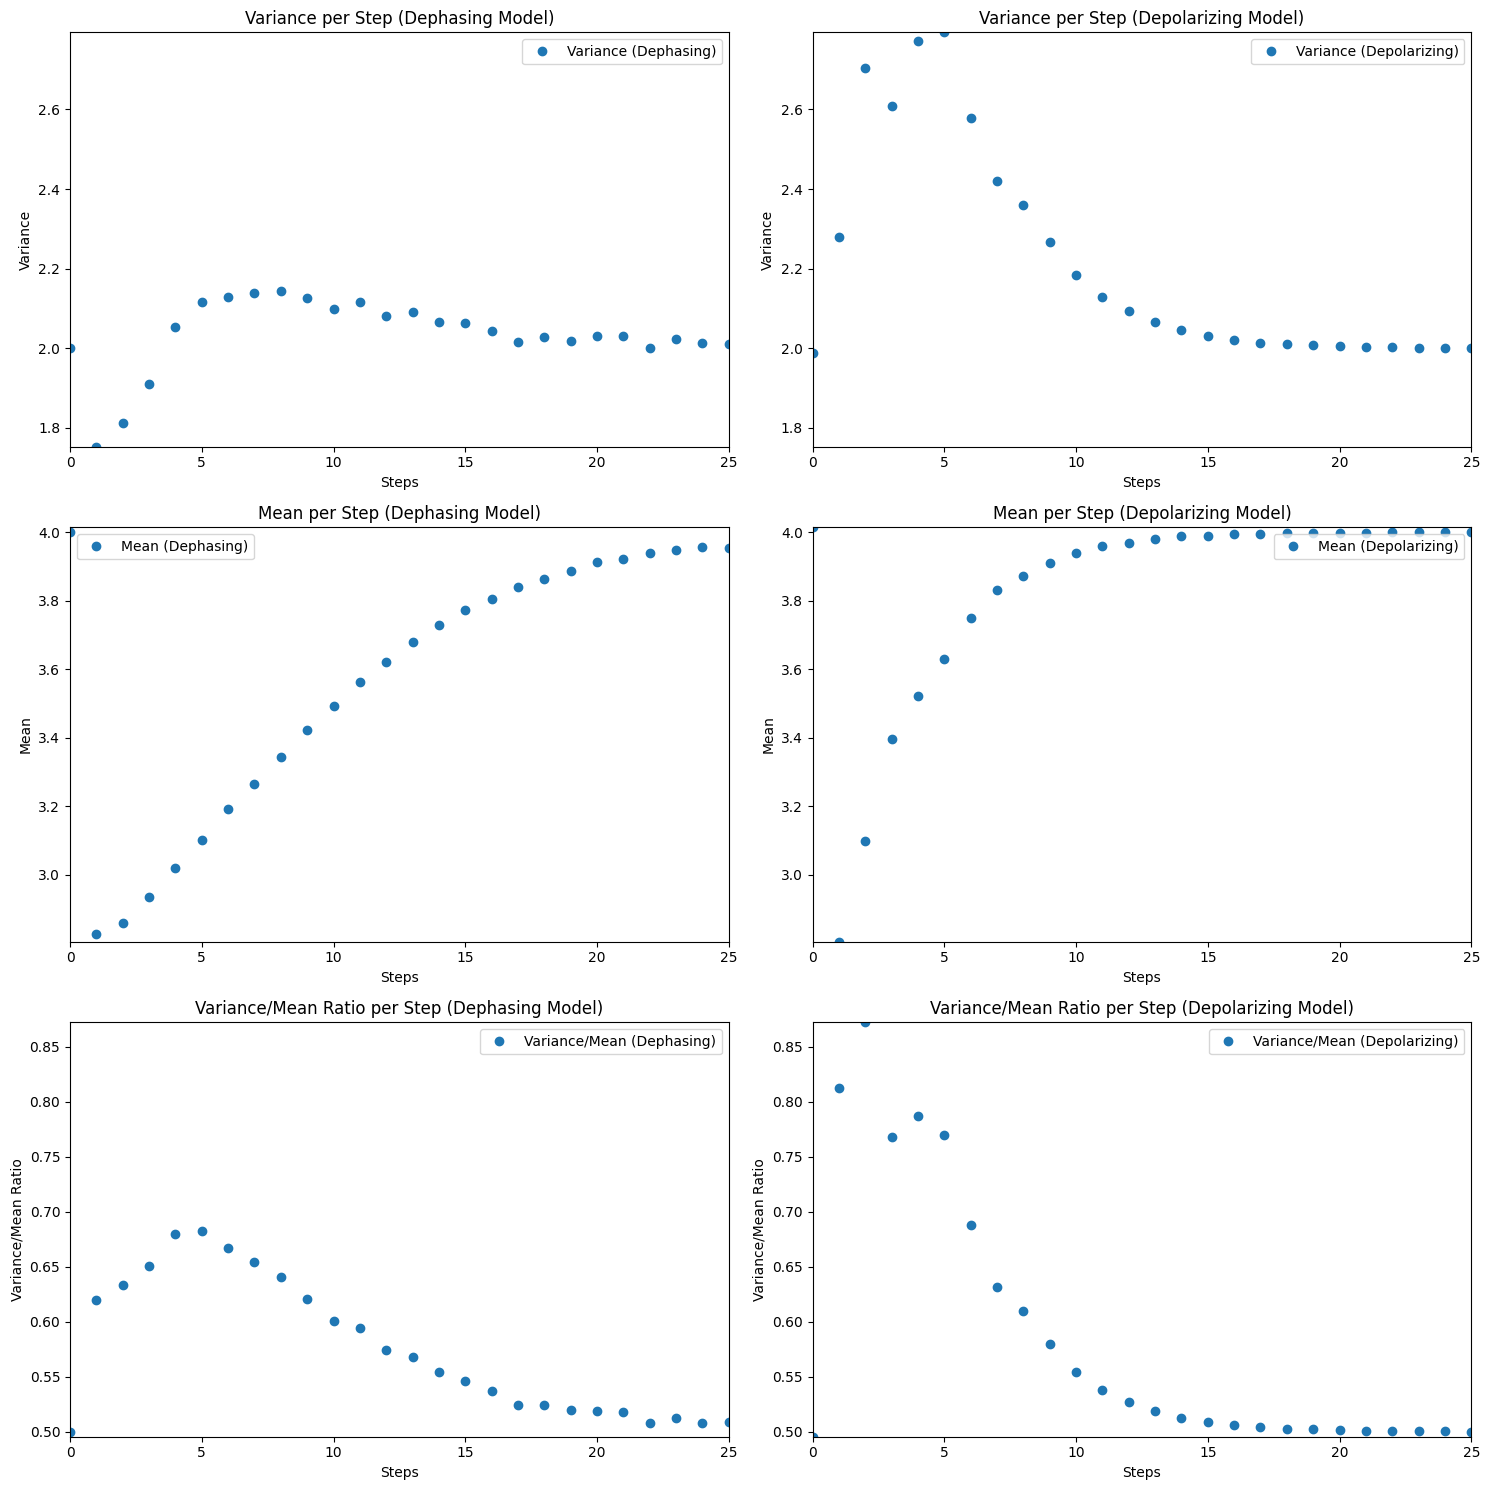

In [17]:
import matplotlib.pyplot as plt

# Assuming calc_kinks_probability, calc_kinks_mean, and calc_kinks_variance are defined elsewhere

# Calculate probabilities, means, variances, and ratios for the dephasing model
probs_dephasing = {s: calc_kinks_probability(d) for s, d in results1349.items()}
means_dephasing = {s: calc_kinks_mean(d) for s, d in probs_dephasing.items()}
variances_dephasing = {s: calc_kinks_variance(d) for s, d in probs_dephasing.items()}
ratios_dephasing = {s: variances_dephasing[s] / means_dephasing[s] for s in probs_dephasing.keys()}

# Calculate probabilities, means, variances, and ratios for the depolarizing model
probs_depolarizing = {s: calc_kinks_probability(d) for s, d in results1435.items()}
means_depolarizing = {s: calc_kinks_mean(d) for s, d in probs_depolarizing.items()}
variances_depolarizing = {s: calc_kinks_variance(d) for s, d in probs_depolarizing.items()}
ratios_depolarizing = {s: variances_depolarizing[s] / means_depolarizing[s] for s in probs_depolarizing.keys()}

# Determine common x and y limits
x_limits = [min(min(variances_dephasing.keys()), min(variances_depolarizing.keys())), 
            max(max(variances_dephasing.keys()), max(variances_depolarizing.keys()))]

y_limits_variance = [min(min(variances_dephasing.values()), min(variances_depolarizing.values())), 
                     max(max(variances_dephasing.values()), max(variances_depolarizing.values()))]

y_limits_mean = [min(min(means_dephasing.values()), min(means_depolarizing.values())), 
                 max(max(means_dephasing.values()), max(means_depolarizing.values()))]

y_limits_ratio = [min(min(ratios_dephasing.values()), min(ratios_depolarizing.values())), 
                  max(max(ratios_dephasing.values()), max(ratios_depolarizing.values()))]

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot Variance for the dephasing model
axs[0, 0].plot(variances_dephasing.keys(), variances_dephasing.values(), 'o', label='Variance (Dephasing)')
axs[0, 0].set_title('Variance per Step (Dephasing Model)')
axs[0, 0].set_xlabel('Steps')
axs[0, 0].set_ylabel('Variance')
axs[0, 0].set_xlim(x_limits)
axs[0, 0].set_ylim(y_limits_variance)
axs[0, 0].legend()

# Plot Variance for the depolarizing model
axs[0, 1].plot(variances_depolarizing.keys(), variances_depolarizing.values(), 'o', label='Variance (Depolarizing)')
axs[0, 1].set_title('Variance per Step (Depolarizing Model)')
axs[0, 1].set_xlabel('Steps')
axs[0, 1].set_ylabel('Variance')
axs[0, 1].set_xlim(x_limits)
axs[0, 1].set_ylim(y_limits_variance)
axs[0, 1].legend()

# Plot Mean for the dephasing model
axs[1, 0].plot(means_dephasing.keys(), means_dephasing.values(), 'o', label='Mean (Dephasing)')
axs[1, 0].set_title('Mean per Step (Dephasing Model)')
axs[1, 0].set_xlabel('Steps')
axs[1, 0].set_ylabel('Mean')
axs[1, 0].set_xlim(x_limits)
axs[1, 0].set_ylim(y_limits_mean)
axs[1, 0].legend()

# Plot Mean for the depolarizing model
axs[1, 1].plot(means_depolarizing.keys(), means_depolarizing.values(), 'o', label='Mean (Depolarizing)')
axs[1, 1].set_title('Mean per Step (Depolarizing Model)')
axs[1, 1].set_xlabel('Steps')
axs[1, 1].set_ylabel('Mean')
axs[1, 1].set_xlim(x_limits)
axs[1, 1].set_ylim(y_limits_mean)
axs[1, 1].legend()

# Plot Variance/Mean Ratio for the dephasing model
axs[2, 0].plot(ratios_dephasing.keys(), ratios_dephasing.values(), 'o', label='Variance/Mean (Dephasing)')
axs[2, 0].set_title('Variance/Mean Ratio per Step (Dephasing Model)')
axs[2, 0].set_xlabel('Steps')
axs[2, 0].set_ylabel('Variance/Mean Ratio')
axs[2, 0].set_xlim(x_limits)
axs[2, 0].set_ylim(y_limits_ratio)
axs[2, 0].legend()

# Plot Variance/Mean Ratio for the depolarizing model
axs[2, 1].plot(ratios_depolarizing.keys(), ratios_depolarizing.values(), 'o', label='Variance/Mean (Depolarizing)')
axs[2, 1].set_title('Variance/Mean Ratio per Step (Depolarizing Model)')
axs[2, 1].set_xlabel('Steps')
axs[2, 1].set_ylabel('Variance/Mean Ratio')
axs[2, 1].set_xlim(x_limits)
axs[2, 1].set_ylim(y_limits_ratio)
axs[2, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

28.10.24

$\rho_p(\tau)=f(\tau) \rho(\tau) + \left(1 - f(\tau)\right) \frac{1}{2^n} I$

for $f(t) =$  :
1.  $e^{-\gamma \tau}$



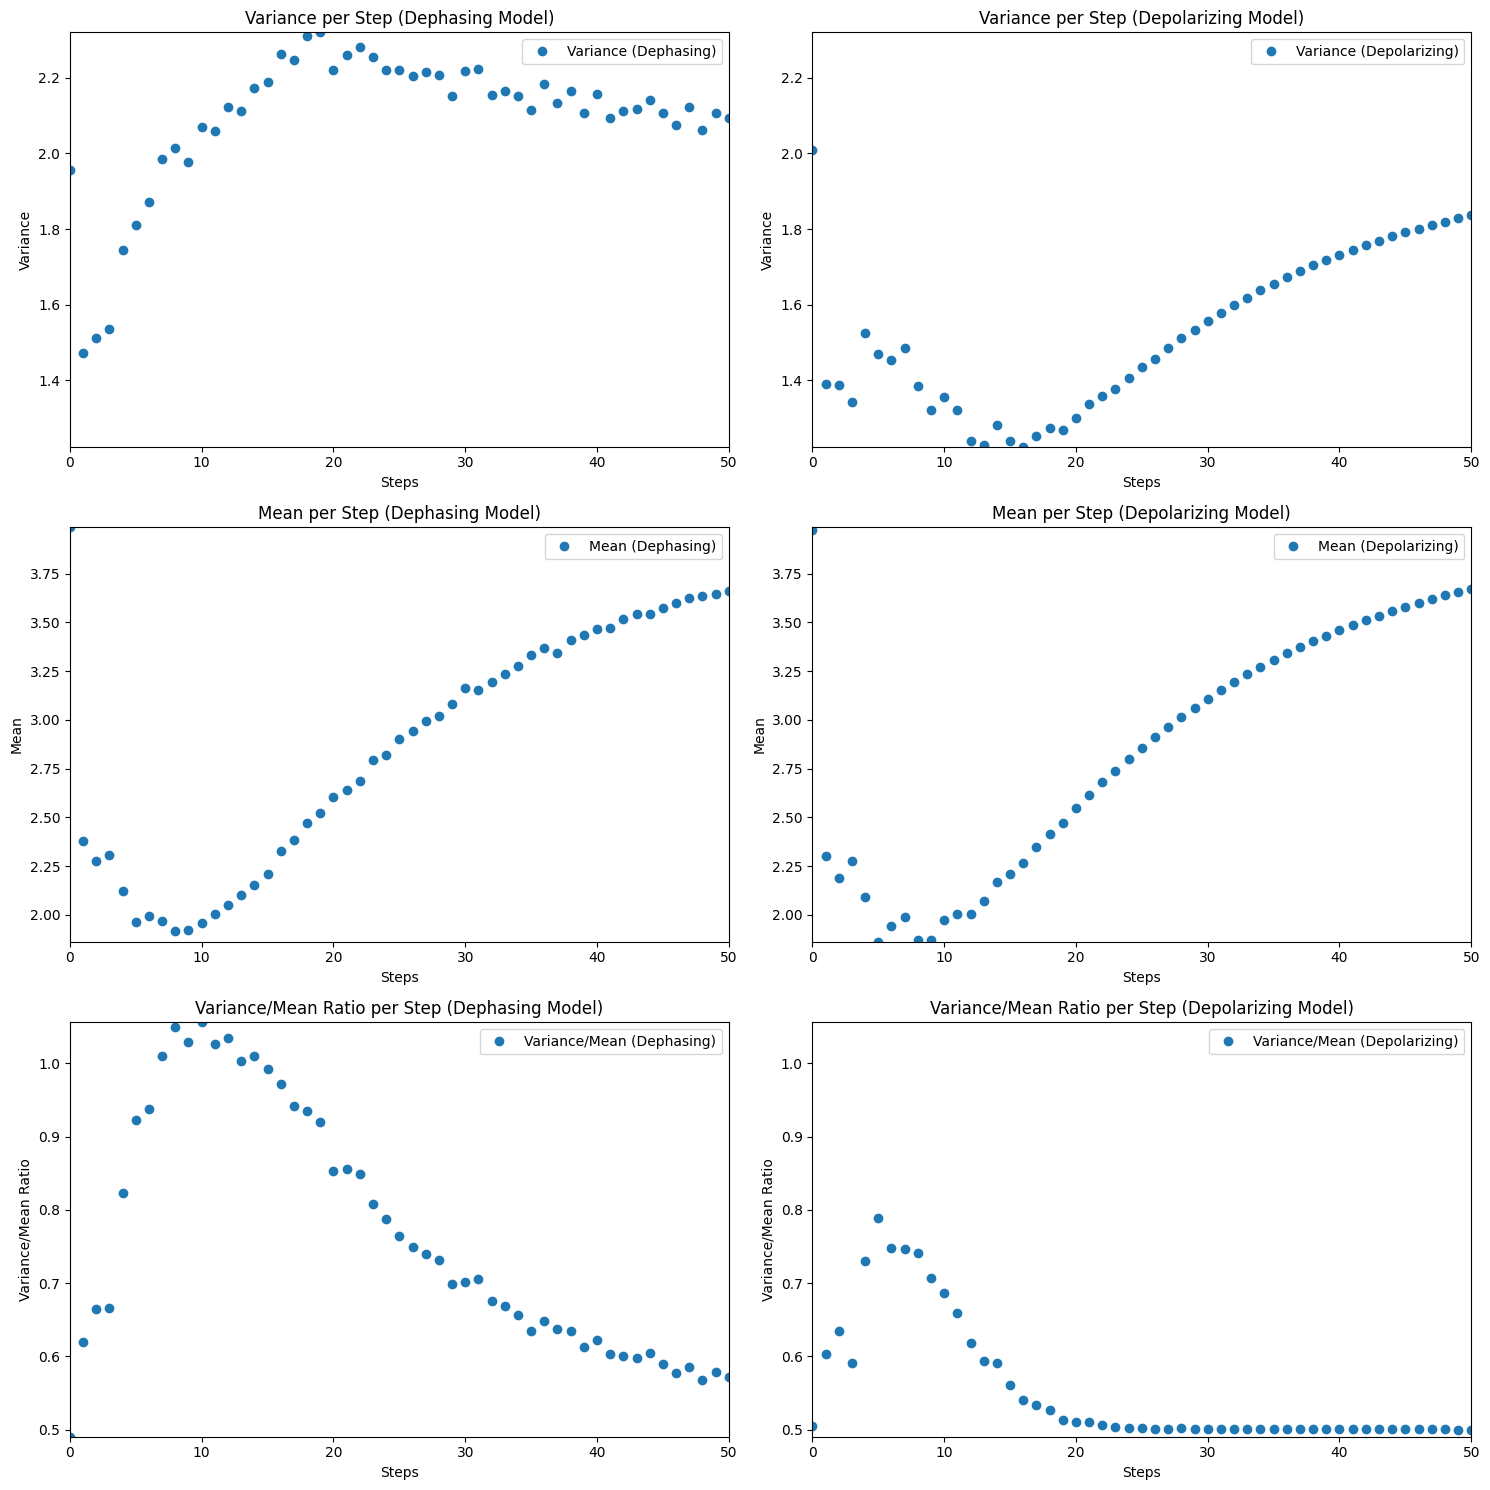

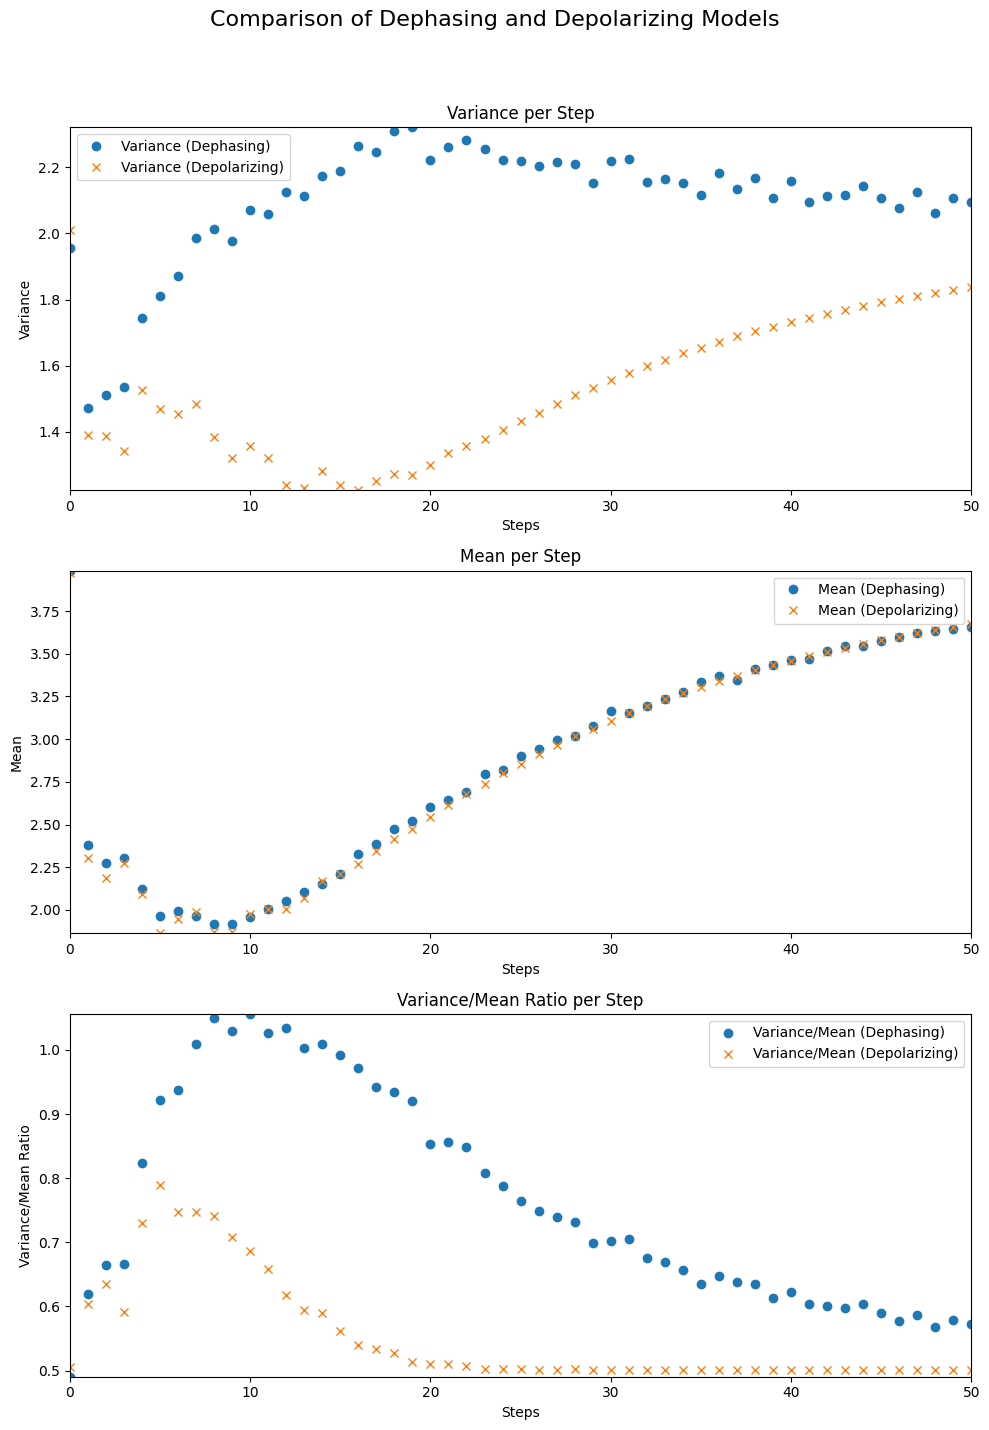

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming calc_kinks_probability, calc_kinks_mean, and calc_kinks_variance are defined elsewhere

# Calculate probabilities, means, variances, and ratios for the dephasing model
probs_dephasing = {s: calc_kinks_probability(d) for s, d in results_noisy.items()}
means_dephasing = {s: calc_kinks_mean(d) for s, d in probs_dephasing.items()}
variances_dephasing = {s: calc_kinks_variance(d) for s, d in probs_dephasing.items()}
ratios_dephasing = {s: variances_dephasing[s] / means_dephasing[s] for s in probs_dephasing.keys()}

# Calculate probabilities, means, variances, and ratios for the depolarizing model
gamma = 0.05
qubits = 8
exponential_decay = lambda steps, gamma: np.exp(-gamma * steps)

# Calculate probabilities, means, variances, and ratios for the dephasing model
probs_sim = {s: calc_kinks_probability(d) for s, d in results_sim.items()}
means_sim = {s: calc_kinks_mean(d) for s, d in probs_sim.items()}
variances_sim = {s: calc_kinks_variance(d) for s, d in probs_sim.items()}
ratios_sim = {s: variances_sim[s] / means_sim[s] for s in probs_sim.keys()}

def depolarizing_error(gamma, probs, static_prob):
    return {s: (1 - exponential_decay(s, gamma)) * static_prob + exponential_decay(s, gamma) * p for s, p in probs.items()}

means_depolarizing = depolarizing_error(gamma, means_sim, qubits / 2)
variances_depolarizing = depolarizing_error(gamma, variances_sim, qubits / 4)
ratios_depolarizing = {s: variances_depolarizing[s] / means_depolarizing[s] for s in probs_dephasing.keys()}

# Determine common x and y limits
x_limits = [min(min(variances_dephasing.keys()), min(variances_depolarizing.keys())), 
            max(max(variances_dephasing.keys()), max(variances_depolarizing.keys()))]

y_limits_variance = [min(min(variances_dephasing.values()), min(variances_depolarizing.values())), 
                     max(max(variances_dephasing.values()), max(variances_depolarizing.values()))]

y_limits_mean = [min(min(means_dephasing.values()), min(means_depolarizing.values())), 
                 max(max(means_dephasing.values()), max(means_depolarizing.values()))]

y_limits_ratio = [min(min(ratios_dephasing.values()), min(ratios_depolarizing.values())), 
                  max(max(ratios_dephasing.values()), max(ratios_depolarizing.values()))]

# Create subplots for individual models
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot Variance for the dephasing model
axs[0, 0].plot(variances_dephasing.keys(), variances_dephasing.values(), 'o', label='Variance (Dephasing)')
axs[0, 0].set_title('Variance per Step (Dephasing Model)')
axs[0, 0].set_xlabel('Steps')
axs[0, 0].set_ylabel('Variance')
axs[0, 0].set_xlim(x_limits)
axs[0, 0].set_ylim(y_limits_variance)
axs[0, 0].legend()

# Plot Variance for the depolarizing model
axs[0, 1].plot(variances_depolarizing.keys(), variances_depolarizing.values(), 'o', label='Variance (Depolarizing)')
axs[0, 1].set_title('Variance per Step (Depolarizing Model)')
axs[0, 1].set_xlabel('Steps')
axs[0, 1].set_ylabel('Variance')
axs[0, 1].set_xlim(x_limits)
axs[0, 1].set_ylim(y_limits_variance)
axs[0, 1].legend()

# Plot Mean for the dephasing model
axs[1, 0].plot(means_dephasing.keys(), means_dephasing.values(), 'o', label='Mean (Dephasing)')
axs[1, 0].set_title('Mean per Step (Dephasing Model)')
axs[1, 0].set_xlabel('Steps')
axs[1, 0].set_ylabel('Mean')
axs[1, 0].set_xlim(x_limits)
axs[1, 0].set_ylim(y_limits_mean)
axs[1, 0].legend()

# Plot Mean for the depolarizing model
axs[1, 1].plot(means_depolarizing.keys(), means_depolarizing.values(), 'o', label='Mean (Depolarizing)')
axs[1, 1].set_title('Mean per Step (Depolarizing Model)')
axs[1, 1].set_xlabel('Steps')
axs[1, 1].set_ylabel('Mean')
axs[1, 1].set_xlim(x_limits)
axs[1, 1].set_ylim(y_limits_mean)
axs[1, 1].legend()

# Plot Variance/Mean Ratio for the dephasing model
axs[2, 0].plot(ratios_dephasing.keys(), ratios_dephasing.values(), 'o', label='Variance/Mean (Dephasing)')
axs[2, 0].set_title('Variance/Mean Ratio per Step (Dephasing Model)')
axs[2, 0].set_xlabel('Steps')
axs[2, 0].set_ylabel('Variance/Mean Ratio')
axs[2, 0].set_xlim(x_limits)
axs[2, 0].set_ylim(y_limits_ratio)
axs[2, 0].legend()

# Plot Variance/Mean Ratio for the depolarizing model
axs[2, 1].plot(ratios_depolarizing.keys(), ratios_depolarizing.values(), 'o', label='Variance/Mean (Depolarizing)')
axs[2, 1].set_title('Variance/Mean Ratio per Step (Depolarizing Model)')
axs[2, 1].set_xlabel('Steps')
axs[2, 1].set_ylabel('Variance/Mean Ratio')
axs[2, 1].set_xlim(x_limits)
axs[2, 1].set_ylim(y_limits_ratio)
axs[2, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Create comparison plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Add a title to the whole figure
fig.suptitle('Comparison of Dephasing and Depolarizing Models', fontsize=16)

# Plot Variance Comparison
axs[0].plot(variances_dephasing.keys(), variances_dephasing.values(), 'o', label='Variance (Dephasing)')
axs[0].plot(variances_depolarizing.keys(), variances_depolarizing.values(), 'x', label='Variance (Depolarizing)')
axs[0].set_title('Variance per Step')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Variance')
axs[0].set_xlim(x_limits)
axs[0].set_ylim(y_limits_variance)
axs[0].legend()

# Plot Mean Comparison
axs[1].plot(means_dephasing.keys(), means_dephasing.values(), 'o', label='Mean (Dephasing)')
axs[1].plot(means_depolarizing.keys(), means_depolarizing.values(), 'x', label='Mean (Depolarizing)')
axs[1].set_title('Mean per Step')
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Mean')
axs[1].set_xlim(x_limits)
axs[1].set_ylim(y_limits_mean)
axs[1].legend()

# Plot Variance/Mean Ratio Comparison
axs[2].plot(ratios_dephasing.keys(), ratios_dephasing.values(), 'o', label='Variance/Mean (Dephasing)')
axs[2].plot(ratios_depolarizing.keys(), ratios_depolarizing.values(), 'x', label='Variance/Mean (Depolarizing)')
axs[2].set_title('Variance/Mean Ratio per Step')
axs[2].set_xlabel('Steps')
axs[2].set_ylabel('Variance/Mean Ratio')
axs[2].set_xlim(x_limits)
axs[2].set_ylim(y_limits_ratio)
axs[2].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

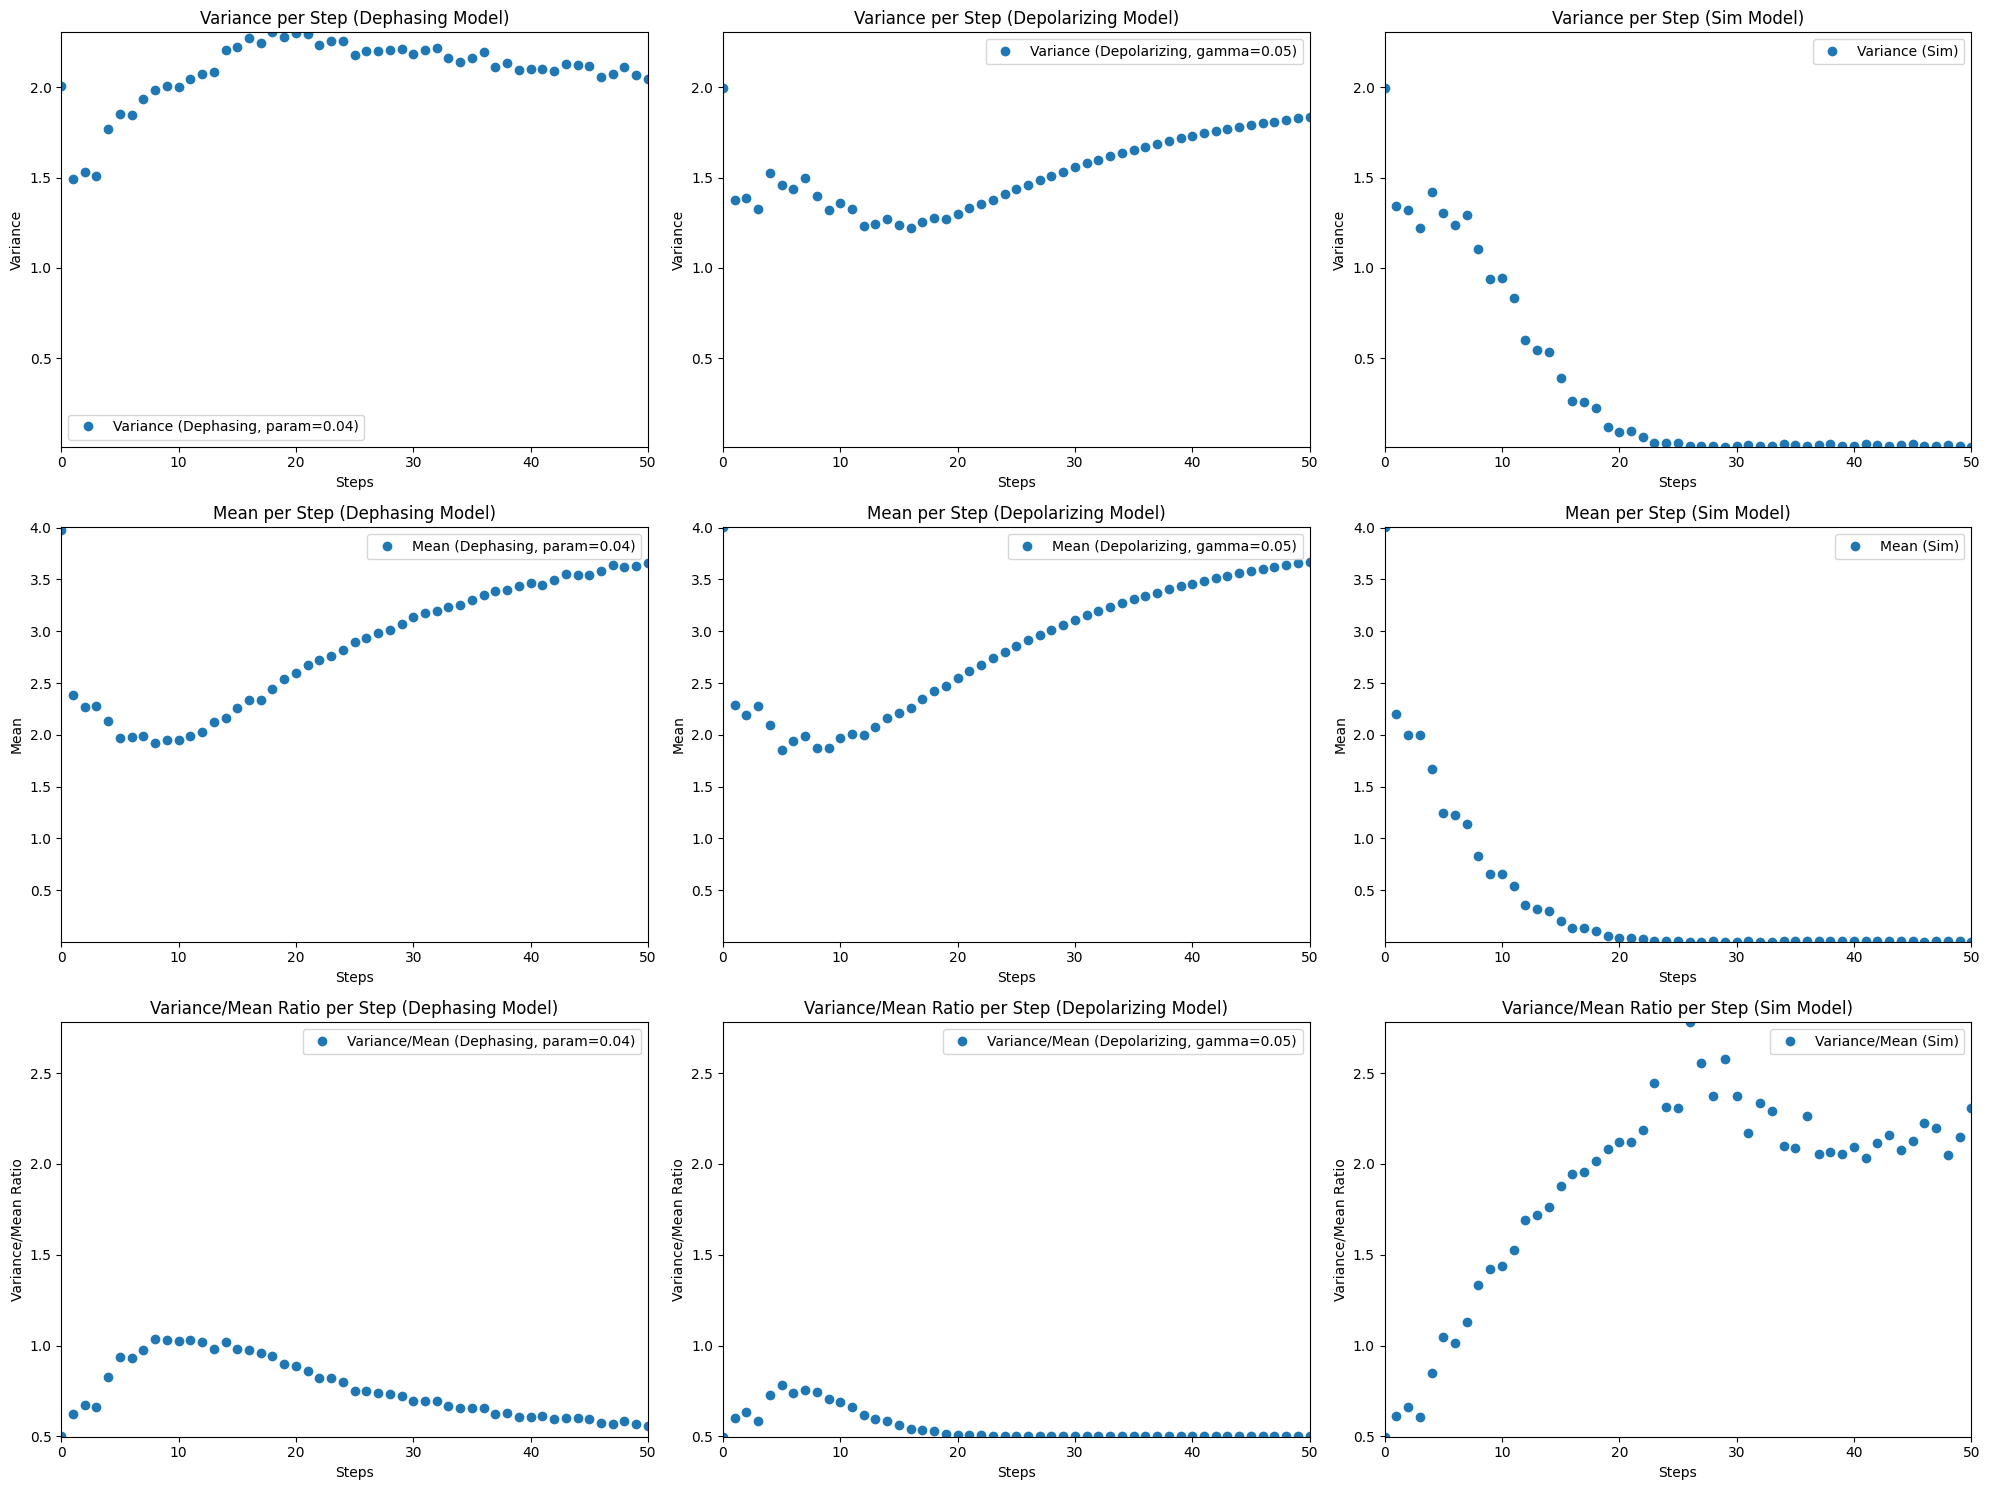

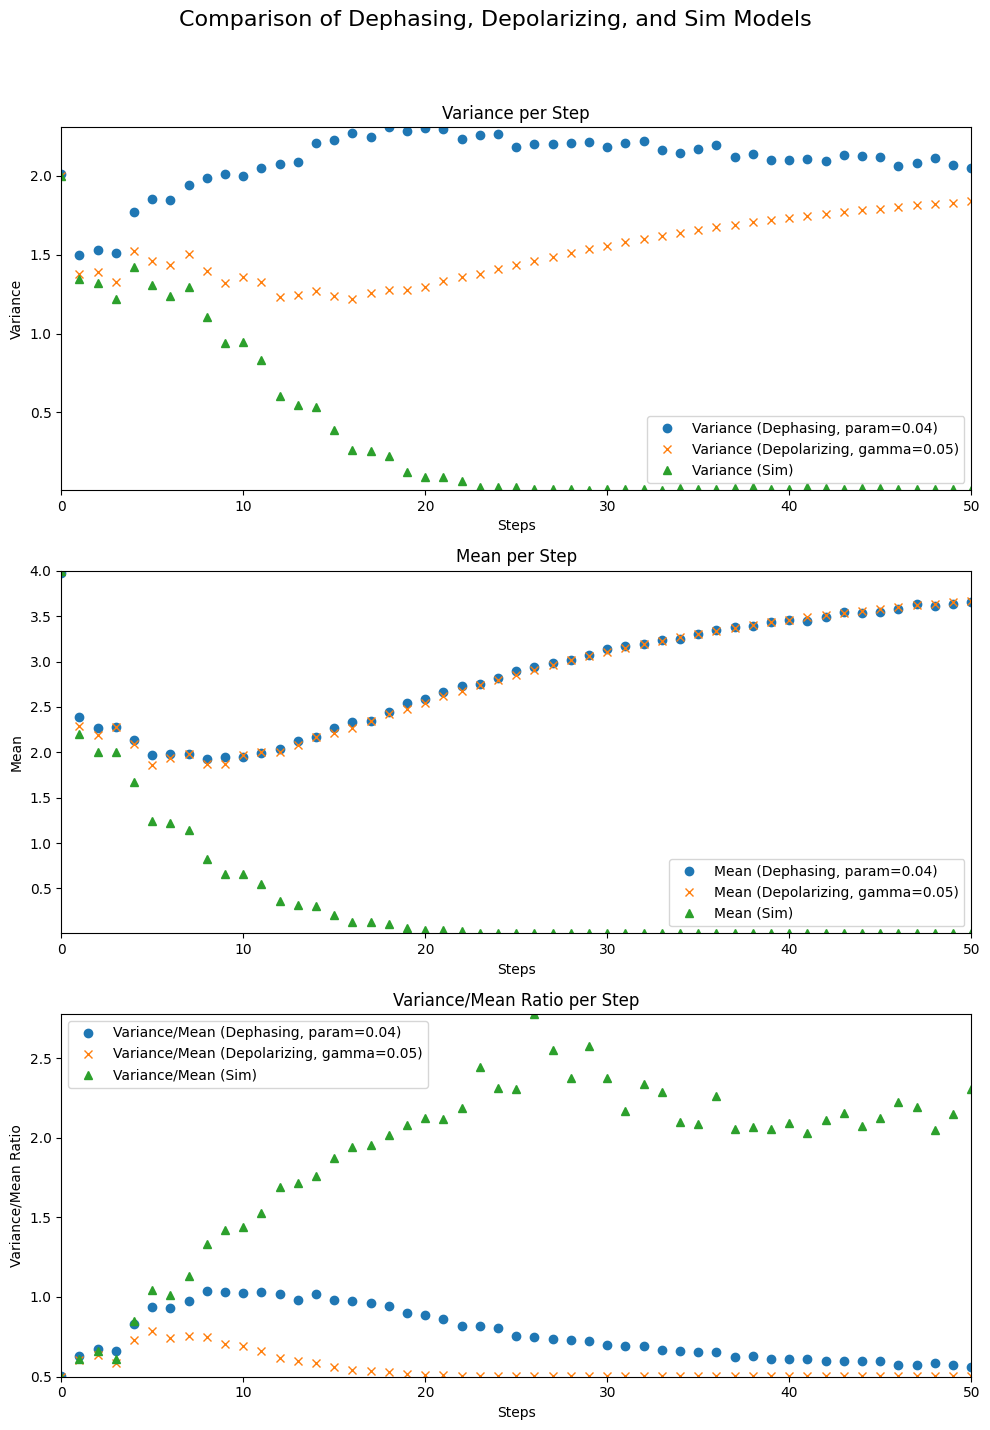

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming calc_kinks_probability, calc_kinks_mean, and calc_kinks_variance are defined elsewhere

# Calculate probabilities, means, variances, and ratios for the dephasing model
dephasing_param = 0.04
probs_dephasing = {s: calc_kinks_probability(d) for s, d in results_noisy.items()}
means_dephasing = {s: calc_kinks_mean(d) for s, d in probs_dephasing.items()}
variances_dephasing = {s: calc_kinks_variance(d) for s, d in probs_dephasing.items()}
ratios_dephasing = {s: variances_dephasing[s] / means_dephasing[s] for s in probs_dephasing.keys()}

# Calculate probabilities, means, variances, and ratios for the depolarizing model
gamma = 0.05
qubits = 8
exponential_decay = lambda steps, gamma: np.exp(-gamma * steps)

# Calculate probabilities, means, variances, and ratios for the sim data
probs_sim = {s: calc_kinks_probability(d) for s, d in results_sim.items()}
means_sim = {s: calc_kinks_mean(d) for s, d in probs_sim.items()}
variances_sim = {s: calc_kinks_variance(d) for s, d in probs_sim.items()}
ratios_sim = {s: variances_sim[s] / means_sim[s] for s in probs_sim.keys()}

def depolarizing_error(gamma, probs, static_prob):
    return {s: (1 - exponential_decay(s, gamma)) * static_prob + exponential_decay(s, gamma) * p for s, p in probs.items()}

means_depolarizing = depolarizing_error(gamma, means_sim, qubits / 2)
variances_depolarizing = depolarizing_error(gamma, variances_sim, qubits / 4)
ratios_depolarizing = {s: variances_depolarizing[s] / means_depolarizing[s] for s in probs_dephasing.keys()}

# Determine common x and y limits
x_limits = [min(min(variances_dephasing.keys()), min(variances_depolarizing.keys())), 
            max(max(variances_dephasing.keys()), max(variances_depolarizing.keys()))]

y_limits_variance = [min(min(variances_dephasing.values()), min(variances_depolarizing.values()), min(variances_sim.values())), 
                     max(max(variances_dephasing.values()), max(variances_depolarizing.values()), max(variances_sim.values()))]

y_limits_mean = [min(min(means_dephasing.values()), min(means_depolarizing.values()), min(means_sim.values())), 
                 max(max(means_dephasing.values()), max(means_depolarizing.values()), max(means_sim.values()))]

y_limits_ratio = [min(min(ratios_dephasing.values()), min(ratios_depolarizing.values()), min(ratios_sim.values())), 
                  max(max(ratios_dephasing.values()), max(ratios_depolarizing.values()), max(ratios_sim.values()))]

# Create subplots for individual models
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

# Plot Variance for the dephasing model
axs[0, 0].plot(variances_dephasing.keys(), variances_dephasing.values(), 'o', label=f'Variance (Dephasing, param={dephasing_param})')
axs[0, 0].set_title('Variance per Step (Dephasing Model)')
axs[0, 0].set_xlabel('Steps')
axs[0, 0].set_ylabel('Variance')
axs[0, 0].set_xlim(x_limits)
axs[0, 0].set_ylim(y_limits_variance)
axs[0, 0].legend()

# Plot Variance for the depolarizing model
axs[0, 1].plot(variances_depolarizing.keys(), variances_depolarizing.values(), 'o', label=f'Variance (Depolarizing, gamma={gamma})')
axs[0, 1].set_title('Variance per Step (Depolarizing Model)')
axs[0, 1].set_xlabel('Steps')
axs[0, 1].set_ylabel('Variance')
axs[0, 1].set_xlim(x_limits)
axs[0, 1].set_ylim(y_limits_variance)
axs[0, 1].legend()

# Plot Variance for the sim model
axs[0, 2].plot(variances_sim.keys(), variances_sim.values(), 'o', label='Variance (Sim)')
axs[0, 2].set_title('Variance per Step (Sim Model)')
axs[0, 2].set_xlabel('Steps')
axs[0, 2].set_ylabel('Variance')
axs[0, 2].set_xlim(x_limits)
axs[0, 2].set_ylim(y_limits_variance)
axs[0, 2].legend()

# Plot Mean for the dephasing model
axs[1, 0].plot(means_dephasing.keys(), means_dephasing.values(), 'o', label=f'Mean (Dephasing, param={dephasing_param})')
axs[1, 0].set_title('Mean per Step (Dephasing Model)')
axs[1, 0].set_xlabel('Steps')
axs[1, 0].set_ylabel('Mean')
axs[1, 0].set_xlim(x_limits)
axs[1, 0].set_ylim(y_limits_mean)
axs[1, 0].legend()

# Plot Mean for the depolarizing model
axs[1, 1].plot(means_depolarizing.keys(), means_depolarizing.values(), 'o', label=f'Mean (Depolarizing, gamma={gamma})')
axs[1, 1].set_title('Mean per Step (Depolarizing Model)')
axs[1, 1].set_xlabel('Steps')
axs[1, 1].set_ylabel('Mean')
axs[1, 1].set_xlim(x_limits)
axs[1, 1].set_ylim(y_limits_mean)
axs[1, 1].legend()

# Plot Mean for the sim model
axs[1, 2].plot(means_sim.keys(), means_sim.values(), 'o', label='Mean (Sim)')
axs[1, 2].set_title('Mean per Step (Sim Model)')
axs[1, 2].set_xlabel('Steps')
axs[1, 2].set_ylabel('Mean')
axs[1, 2].set_xlim(x_limits)
axs[1, 2].set_ylim(y_limits_mean)
axs[1, 2].legend()

# Plot Variance/Mean Ratio for the dephasing model
axs[2, 0].plot(ratios_dephasing.keys(), ratios_dephasing.values(), 'o', label=f'Variance/Mean (Dephasing, param={dephasing_param})')
axs[2, 0].set_title('Variance/Mean Ratio per Step (Dephasing Model)')
axs[2, 0].set_xlabel('Steps')
axs[2, 0].set_ylabel('Variance/Mean Ratio')
axs[2, 0].set_xlim(x_limits)
axs[2, 0].set_ylim(y_limits_ratio)
axs[2, 0].legend()

# Plot Variance/Mean Ratio for the depolarizing model
axs[2, 1].plot(ratios_depolarizing.keys(), ratios_depolarizing.values(), 'o', label=f'Variance/Mean (Depolarizing, gamma={gamma})')
axs[2, 1].set_title('Variance/Mean Ratio per Step (Depolarizing Model)')
axs[2, 1].set_xlabel('Steps')
axs[2, 1].set_ylabel('Variance/Mean Ratio')
axs[2, 1].set_xlim(x_limits)
axs[2, 1].set_ylim(y_limits_ratio)
axs[2, 1].legend()

# Plot Variance/Mean Ratio for the sim model
axs[2, 2].plot(ratios_sim.keys(), ratios_sim.values(), 'o', label='Variance/Mean (Sim)')
axs[2, 2].set_title('Variance/Mean Ratio per Step (Sim Model)')
axs[2, 2].set_xlabel('Steps')
axs[2, 2].set_ylabel('Variance/Mean Ratio')
axs[2, 2].set_xlim(x_limits)
axs[2, 2].set_ylim(y_limits_ratio)
axs[2, 2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Create comparison plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Add a title to the whole figure
fig.suptitle('Comparison of Dephasing, Depolarizing, and Sim Models', fontsize=16)

# Plot Variance Comparison
axs[0].plot(variances_dephasing.keys(), variances_dephasing.values(), 'o', label=f'Variance (Dephasing, param={dephasing_param})')
axs[0].plot(variances_depolarizing.keys(), variances_depolarizing.values(), 'x', label=f'Variance (Depolarizing, gamma={gamma})')
axs[0].plot(variances_sim.keys(), variances_sim.values(), '^', label='Variance (Sim)')
axs[0].set_title('Variance per Step')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Variance')
axs[0].set_xlim(x_limits)
axs[0].set_ylim(y_limits_variance)
axs[0].legend()

# Plot Mean Comparison
axs[1].plot(means_dephasing.keys(), means_dephasing.values(), 'o', label=f'Mean (Dephasing, param={dephasing_param})')
axs[1].plot(means_depolarizing.keys(), means_depolarizing.values(), 'x', label=f'Mean (Depolarizing, gamma={gamma})')
axs[1].plot(means_sim.keys(), means_sim.values(), '^', label='Mean (Sim)')
axs[1].set_title('Mean per Step')
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Mean')
axs[1].set_xlim(x_limits)
axs[1].set_ylim(y_limits_mean)
axs[1].legend()

# Plot Variance/Mean Ratio Comparison
axs[2].plot(ratios_dephasing.keys(), ratios_dephasing.values(), 'o', label=f'Variance/Mean (Dephasing, param={dephasing_param})')
axs[2].plot(ratios_depolarizing.keys(), ratios_depolarizing.values(), 'x', label=f'Variance/Mean (Depolarizing, gamma={gamma})')
axs[2].plot(ratios_sim.keys(), ratios_sim.values(), '^', label='Variance/Mean (Sim)')
axs[2].set_title('Variance/Mean Ratio per Step')
axs[2].set_xlabel('Steps')
axs[2].set_ylabel('Variance/Mean Ratio')
axs[2].set_xlim(x_limits)
axs[2].set_ylim(y_limits_ratio)
axs[2].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

$\rho_p(\tau) = f(\tau) \rho(\tau) + \left(1 - f(\tau)\right) \frac{1}{2^n} I$

$\langle O \rangle_{\rho} = \text{Tr}[\rho(\tau) O]$

\begin{align*}
\langle O \rangle_{\rho_p} &= \text{Tr}[\rho_p(\tau) O] \\
&= \text{Tr}\left[ \left( f(\tau) \rho(\tau) + \left(1 - f(\tau) \right) \frac{1}{2^n} I \right) O \right] \\
&= f(\tau) \text{Tr}[\rho(\tau) O] + \left(1 - f(\tau) \right) \frac{1}{2^n} \text{Tr}[I O]
\end{align*}

$\text{Tr}[I O] = \text{Tr}[O]$

$\langle O \rangle_{\rho_p} = f(\tau) \langle O \rangle_{\rho} + \left(1 - f(\tau) \right) \frac{1}{2^n} \text{Tr}[O]$

$\text{Tr}[O] = \sum_i O_{ii}$


$\langle O \rangle_{\rho_p} = f(\tau) \left( \text{Tr}[\rho(\tau) O] \right) + \left(1 - f(\tau) \right) \frac{\text{Tr}[O]}{2^n}$

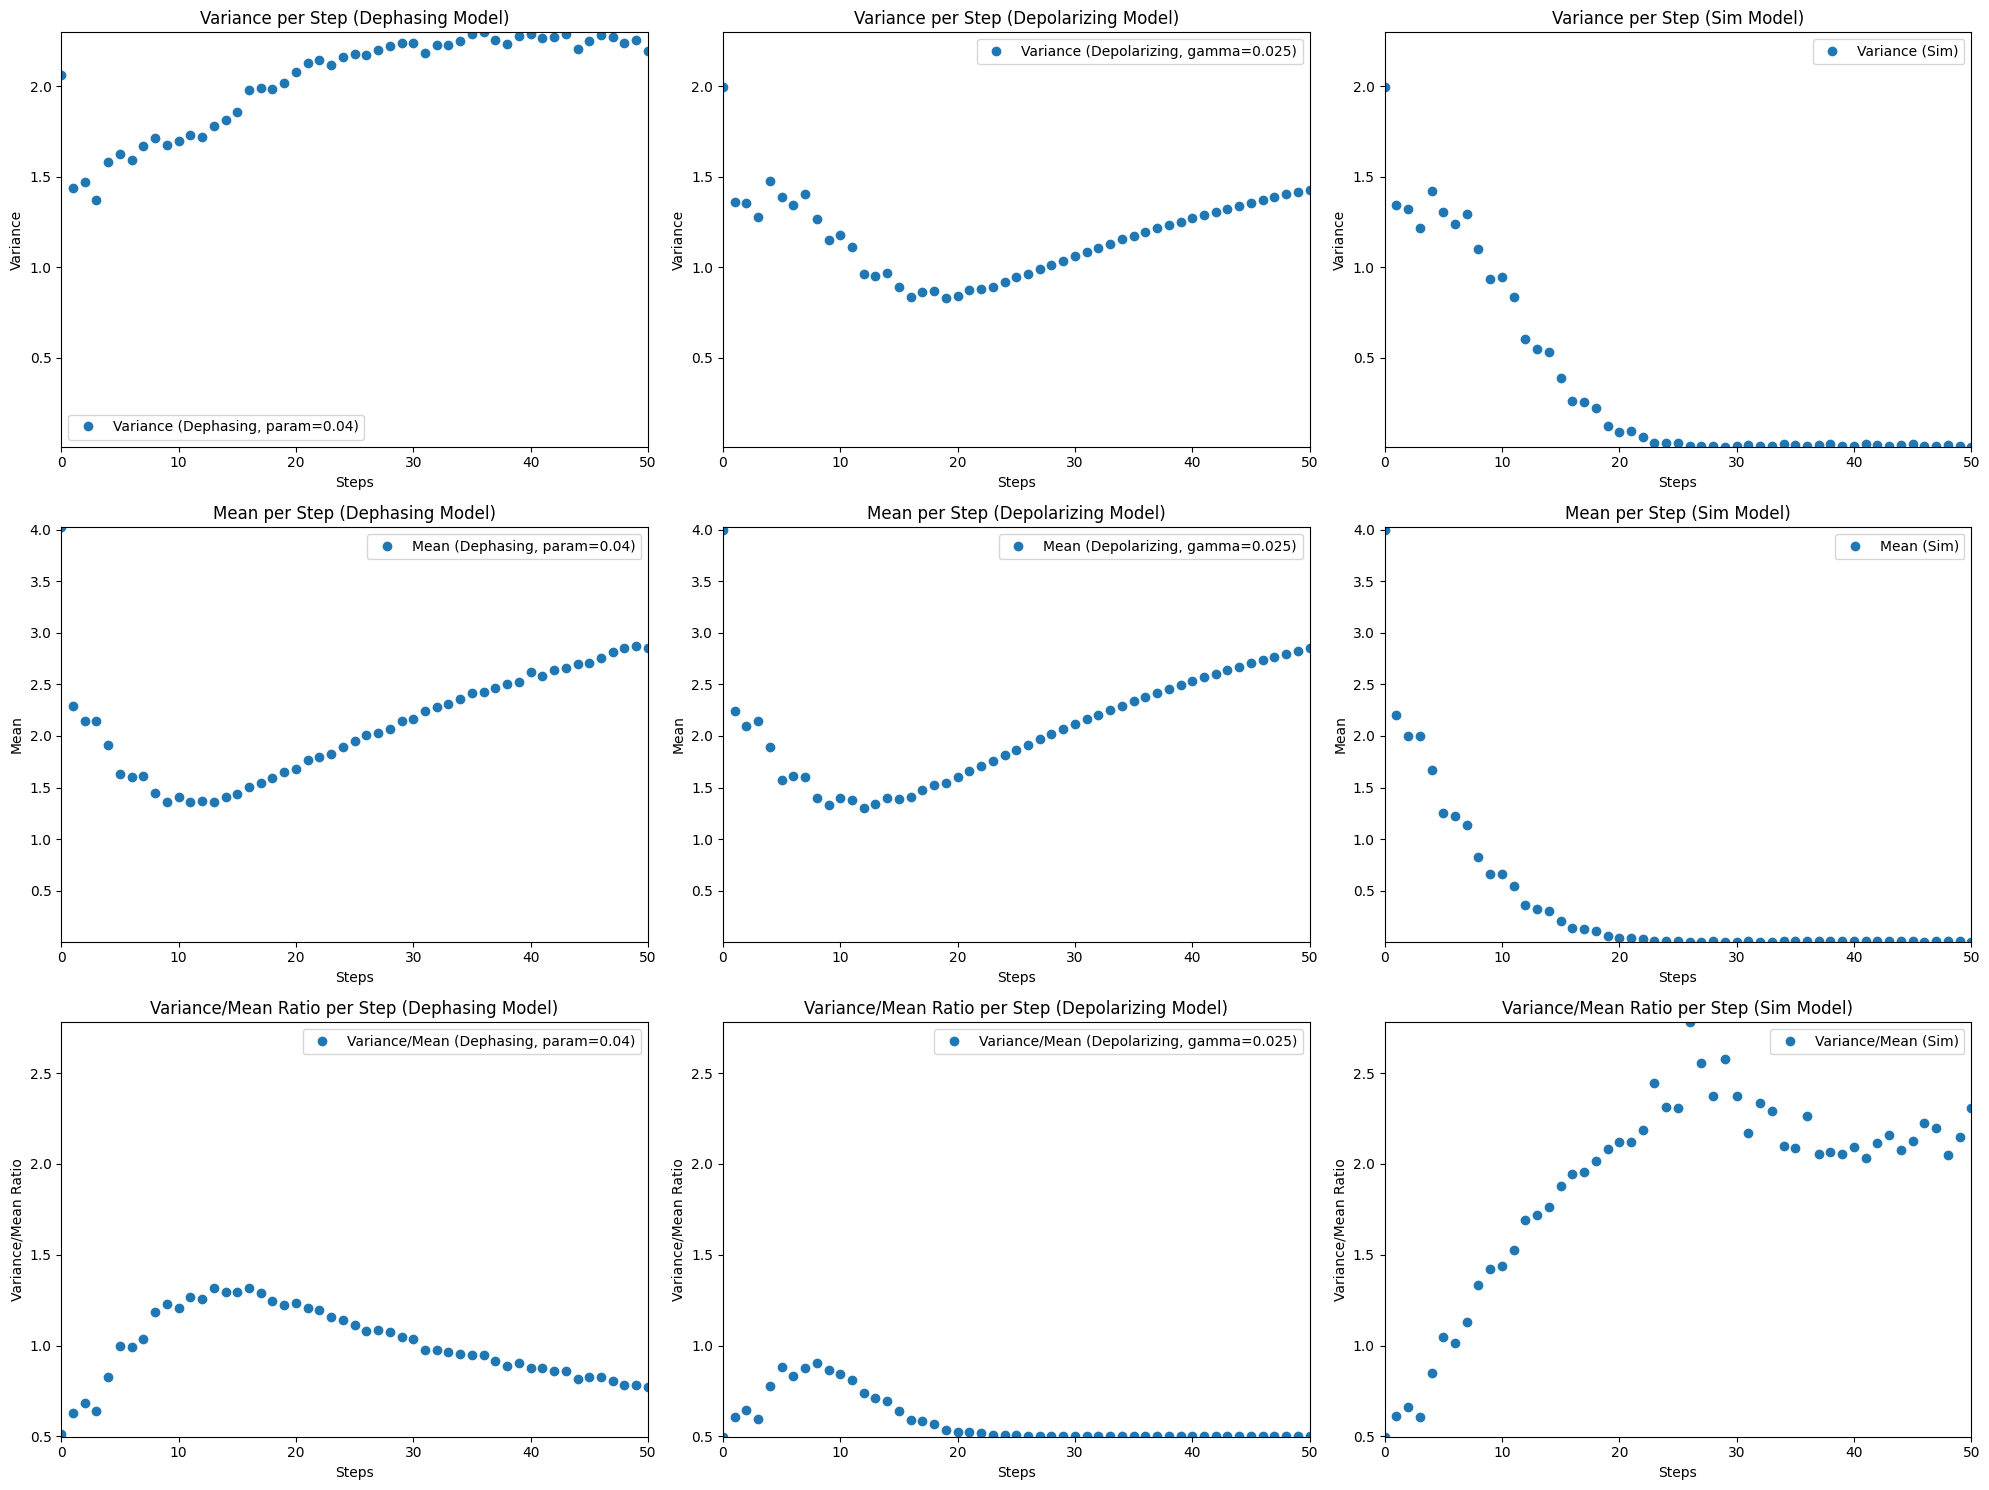

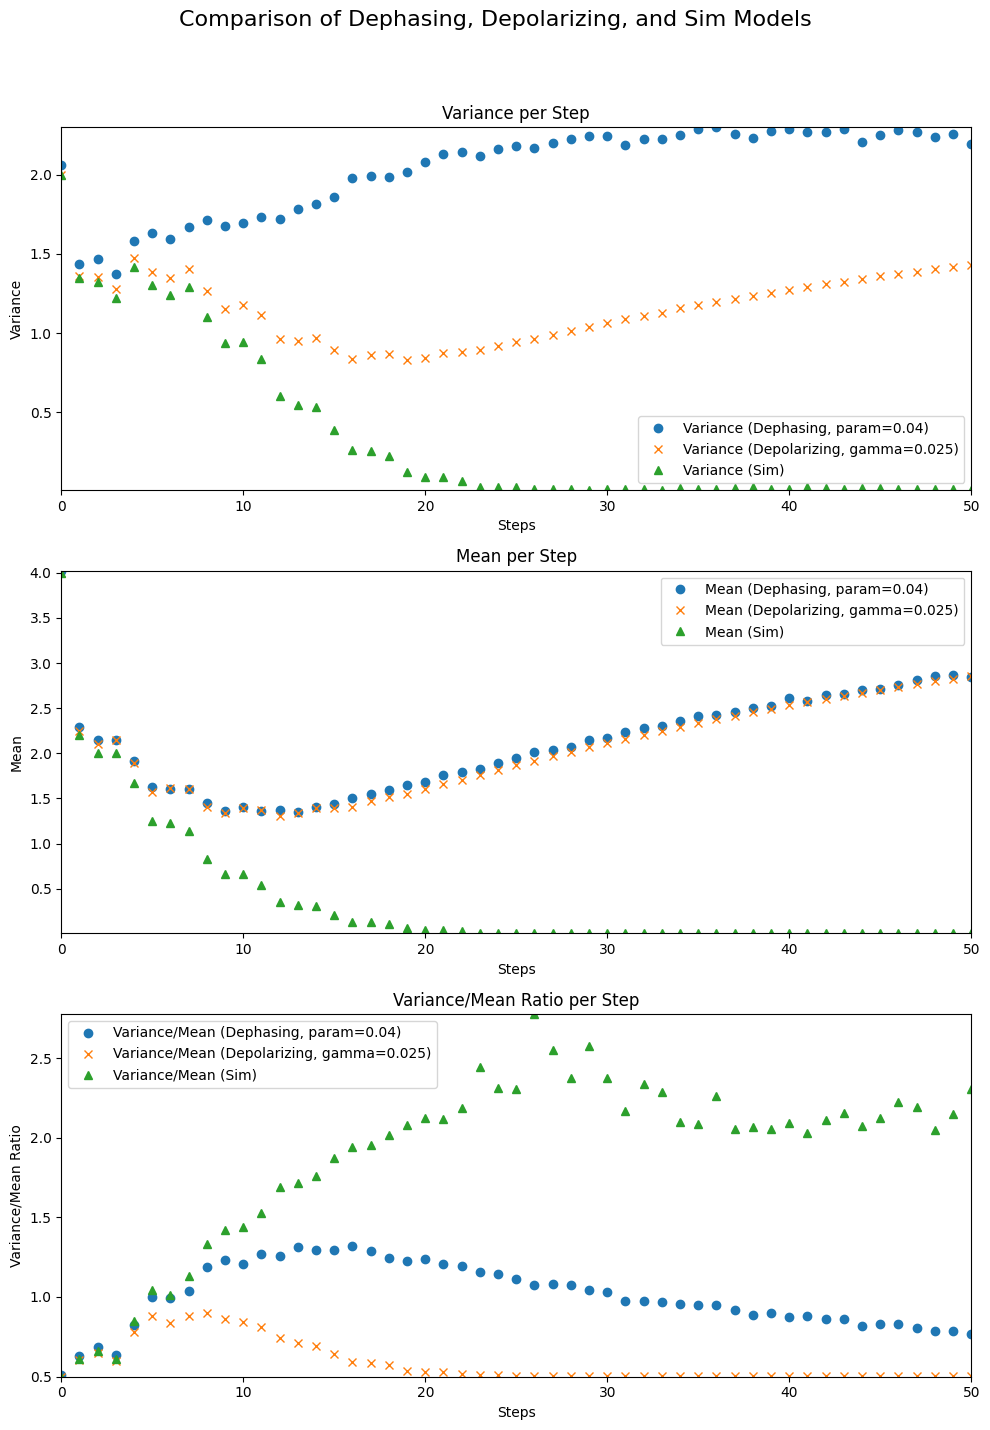

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming calc_kinks_probability, calc_kinks_mean, and calc_kinks_variance are defined elsewhere

# Calculate probabilities, means, variances, and ratios for the dephasing model
dephasing_param = 0.04
probs_dephasing = {s: calc_kinks_probability(d) for s, d in results_noisy_02.items()}
means_dephasing = {s: calc_kinks_mean(d) for s, d in probs_dephasing.items()}
variances_dephasing = {s: calc_kinks_variance(d) for s, d in probs_dephasing.items()}
ratios_dephasing = {s: variances_dephasing[s] / means_dephasing[s] for s in probs_dephasing.keys()}

# Calculate probabilities, means, variances, and ratios for the depolarizing model
gamma = 0.025
qubits = 8
exponential_decay = lambda steps, gamma: np.exp(-gamma * steps)

# Calculate probabilities, means, variances, and ratios for the sim data
probs_sim = {s: calc_kinks_probability(d) for s, d in results_sim.items()}
means_sim = {s: calc_kinks_mean(d) for s, d in probs_sim.items()}
variances_sim = {s: calc_kinks_variance(d) for s, d in probs_sim.items()}
ratios_sim = {s: variances_sim[s] / means_sim[s] for s in probs_sim.keys()}

def depolarizing_error(gamma, probs, static_prob):
    return {s: (1 - exponential_decay(s, gamma)) * static_prob + exponential_decay(s, gamma) * p for s, p in probs.items()}

means_depolarizing = depolarizing_error(gamma, means_sim, qubits / 2)
variances_depolarizing = depolarizing_error(gamma, variances_sim, qubits / 4)
ratios_depolarizing = {s: variances_depolarizing[s] / means_depolarizing[s] for s in probs_dephasing.keys()}

# Determine common x and y limits
x_limits = [min(min(variances_dephasing.keys()), min(variances_depolarizing.keys())), 
            max(max(variances_dephasing.keys()), max(variances_depolarizing.keys()))]

y_limits_variance = [min(min(variances_dephasing.values()), min(variances_depolarizing.values()), min(variances_sim.values())), 
                     max(max(variances_dephasing.values()), max(variances_depolarizing.values()), max(variances_sim.values()))]

y_limits_mean = [min(min(means_dephasing.values()), min(means_depolarizing.values()), min(means_sim.values())), 
                 max(max(means_dephasing.values()), max(means_depolarizing.values()), max(means_sim.values()))]

y_limits_ratio = [min(min(ratios_dephasing.values()), min(ratios_depolarizing.values()), min(ratios_sim.values())), 
                  max(max(ratios_dephasing.values()), max(ratios_depolarizing.values()), max(ratios_sim.values()))]

# Create subplots for individual models
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

# Plot Variance for the dephasing model
axs[0, 0].plot(variances_dephasing.keys(), variances_dephasing.values(), 'o', label=f'Variance (Dephasing, param={dephasing_param})')
axs[0, 0].set_title('Variance per Step (Dephasing Model)')
axs[0, 0].set_xlabel('Steps')
axs[0, 0].set_ylabel('Variance')
axs[0, 0].set_xlim(x_limits)
axs[0, 0].set_ylim(y_limits_variance)
axs[0, 0].legend()

# Plot Variance for the depolarizing model
axs[0, 1].plot(variances_depolarizing.keys(), variances_depolarizing.values(), 'o', label=f'Variance (Depolarizing, gamma={gamma})')
axs[0, 1].set_title('Variance per Step (Depolarizing Model)')
axs[0, 1].set_xlabel('Steps')
axs[0, 1].set_ylabel('Variance')
axs[0, 1].set_xlim(x_limits)
axs[0, 1].set_ylim(y_limits_variance)
axs[0, 1].legend()

# Plot Variance for the sim model
axs[0, 2].plot(variances_sim.keys(), variances_sim.values(), 'o', label='Variance (Sim)')
axs[0, 2].set_title('Variance per Step (Sim Model)')
axs[0, 2].set_xlabel('Steps')
axs[0, 2].set_ylabel('Variance')
axs[0, 2].set_xlim(x_limits)
axs[0, 2].set_ylim(y_limits_variance)
axs[0, 2].legend()

# Plot Mean for the dephasing model
axs[1, 0].plot(means_dephasing.keys(), means_dephasing.values(), 'o', label=f'Mean (Dephasing, param={dephasing_param})')
axs[1, 0].set_title('Mean per Step (Dephasing Model)')
axs[1, 0].set_xlabel('Steps')
axs[1, 0].set_ylabel('Mean')
axs[1, 0].set_xlim(x_limits)
axs[1, 0].set_ylim(y_limits_mean)
axs[1, 0].legend()

# Plot Mean for the depolarizing model
axs[1, 1].plot(means_depolarizing.keys(), means_depolarizing.values(), 'o', label=f'Mean (Depolarizing, gamma={gamma})')
axs[1, 1].set_title('Mean per Step (Depolarizing Model)')
axs[1, 1].set_xlabel('Steps')
axs[1, 1].set_ylabel('Mean')
axs[1, 1].set_xlim(x_limits)
axs[1, 1].set_ylim(y_limits_mean)
axs[1, 1].legend()

# Plot Mean for the sim model
axs[1, 2].plot(means_sim.keys(), means_sim.values(), 'o', label='Mean (Sim)')
axs[1, 2].set_title('Mean per Step (Sim Model)')
axs[1, 2].set_xlabel('Steps')
axs[1, 2].set_ylabel('Mean')
axs[1, 2].set_xlim(x_limits)
axs[1, 2].set_ylim(y_limits_mean)
axs[1, 2].legend()

# Plot Variance/Mean Ratio for the dephasing model
axs[2, 0].plot(ratios_dephasing.keys(), ratios_dephasing.values(), 'o', label=f'Variance/Mean (Dephasing, param={dephasing_param})')
axs[2, 0].set_title('Variance/Mean Ratio per Step (Dephasing Model)')
axs[2, 0].set_xlabel('Steps')
axs[2, 0].set_ylabel('Variance/Mean Ratio')
axs[2, 0].set_xlim(x_limits)
axs[2, 0].set_ylim(y_limits_ratio)
axs[2, 0].legend()

# Plot Variance/Mean Ratio for the depolarizing model
axs[2, 1].plot(ratios_depolarizing.keys(), ratios_depolarizing.values(), 'o', label=f'Variance/Mean (Depolarizing, gamma={gamma})')
axs[2, 1].set_title('Variance/Mean Ratio per Step (Depolarizing Model)')
axs[2, 1].set_xlabel('Steps')
axs[2, 1].set_ylabel('Variance/Mean Ratio')
axs[2, 1].set_xlim(x_limits)
axs[2, 1].set_ylim(y_limits_ratio)
axs[2, 1].legend()

# Plot Variance/Mean Ratio for the sim model
axs[2, 2].plot(ratios_sim.keys(), ratios_sim.values(), 'o', label='Variance/Mean (Sim)')
axs[2, 2].set_title('Variance/Mean Ratio per Step (Sim Model)')
axs[2, 2].set_xlabel('Steps')
axs[2, 2].set_ylabel('Variance/Mean Ratio')
axs[2, 2].set_xlim(x_limits)
axs[2, 2].set_ylim(y_limits_ratio)
axs[2, 2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Create comparison plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Add a title to the whole figure
fig.suptitle('Comparison of Dephasing, Depolarizing, and Sim Models', fontsize=16)

# Plot Variance Comparison
axs[0].plot(variances_dephasing.keys(), variances_dephasing.values(), 'o', label=f'Variance (Dephasing, param={dephasing_param})')
axs[0].plot(variances_depolarizing.keys(), variances_depolarizing.values(), 'x', label=f'Variance (Depolarizing, gamma={gamma})')
axs[0].plot(variances_sim.keys(), variances_sim.values(), '^', label='Variance (Sim)')
axs[0].set_title('Variance per Step')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Variance')
axs[0].set_xlim(x_limits)
axs[0].set_ylim(y_limits_variance)
axs[0].legend()

# Plot Mean Comparison
axs[1].plot(means_dephasing.keys(), means_dephasing.values(), 'o', label=f'Mean (Dephasing, param={dephasing_param})')
axs[1].plot(means_depolarizing.keys(), means_depolarizing.values(), 'x', label=f'Mean (Depolarizing, gamma={gamma})')
axs[1].plot(means_sim.keys(), means_sim.values(), '^', label='Mean (Sim)')
axs[1].set_title('Mean per Step')
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Mean')
axs[1].set_xlim(x_limits)
axs[1].set_ylim(y_limits_mean)
axs[1].legend()

# Plot Variance/Mean Ratio Comparison
axs[2].plot(ratios_dephasing.keys(), ratios_dephasing.values(), 'o', label=f'Variance/Mean (Dephasing, param={dephasing_param})')
axs[2].plot(ratios_depolarizing.keys(), ratios_depolarizing.values(), 'x', label=f'Variance/Mean (Depolarizing, gamma={gamma})')
axs[2].plot(ratios_sim.keys(), ratios_sim.values(), '^', label='Variance/Mean (Sim)')
axs[2].set_title('Variance/Mean Ratio per Step')
axs[2].set_xlabel('Steps')
axs[2].set_ylabel('Variance/Mean Ratio')
axs[2].set_xlim(x_limits)
axs[2].set_ylim(y_limits_ratio)
axs[2].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

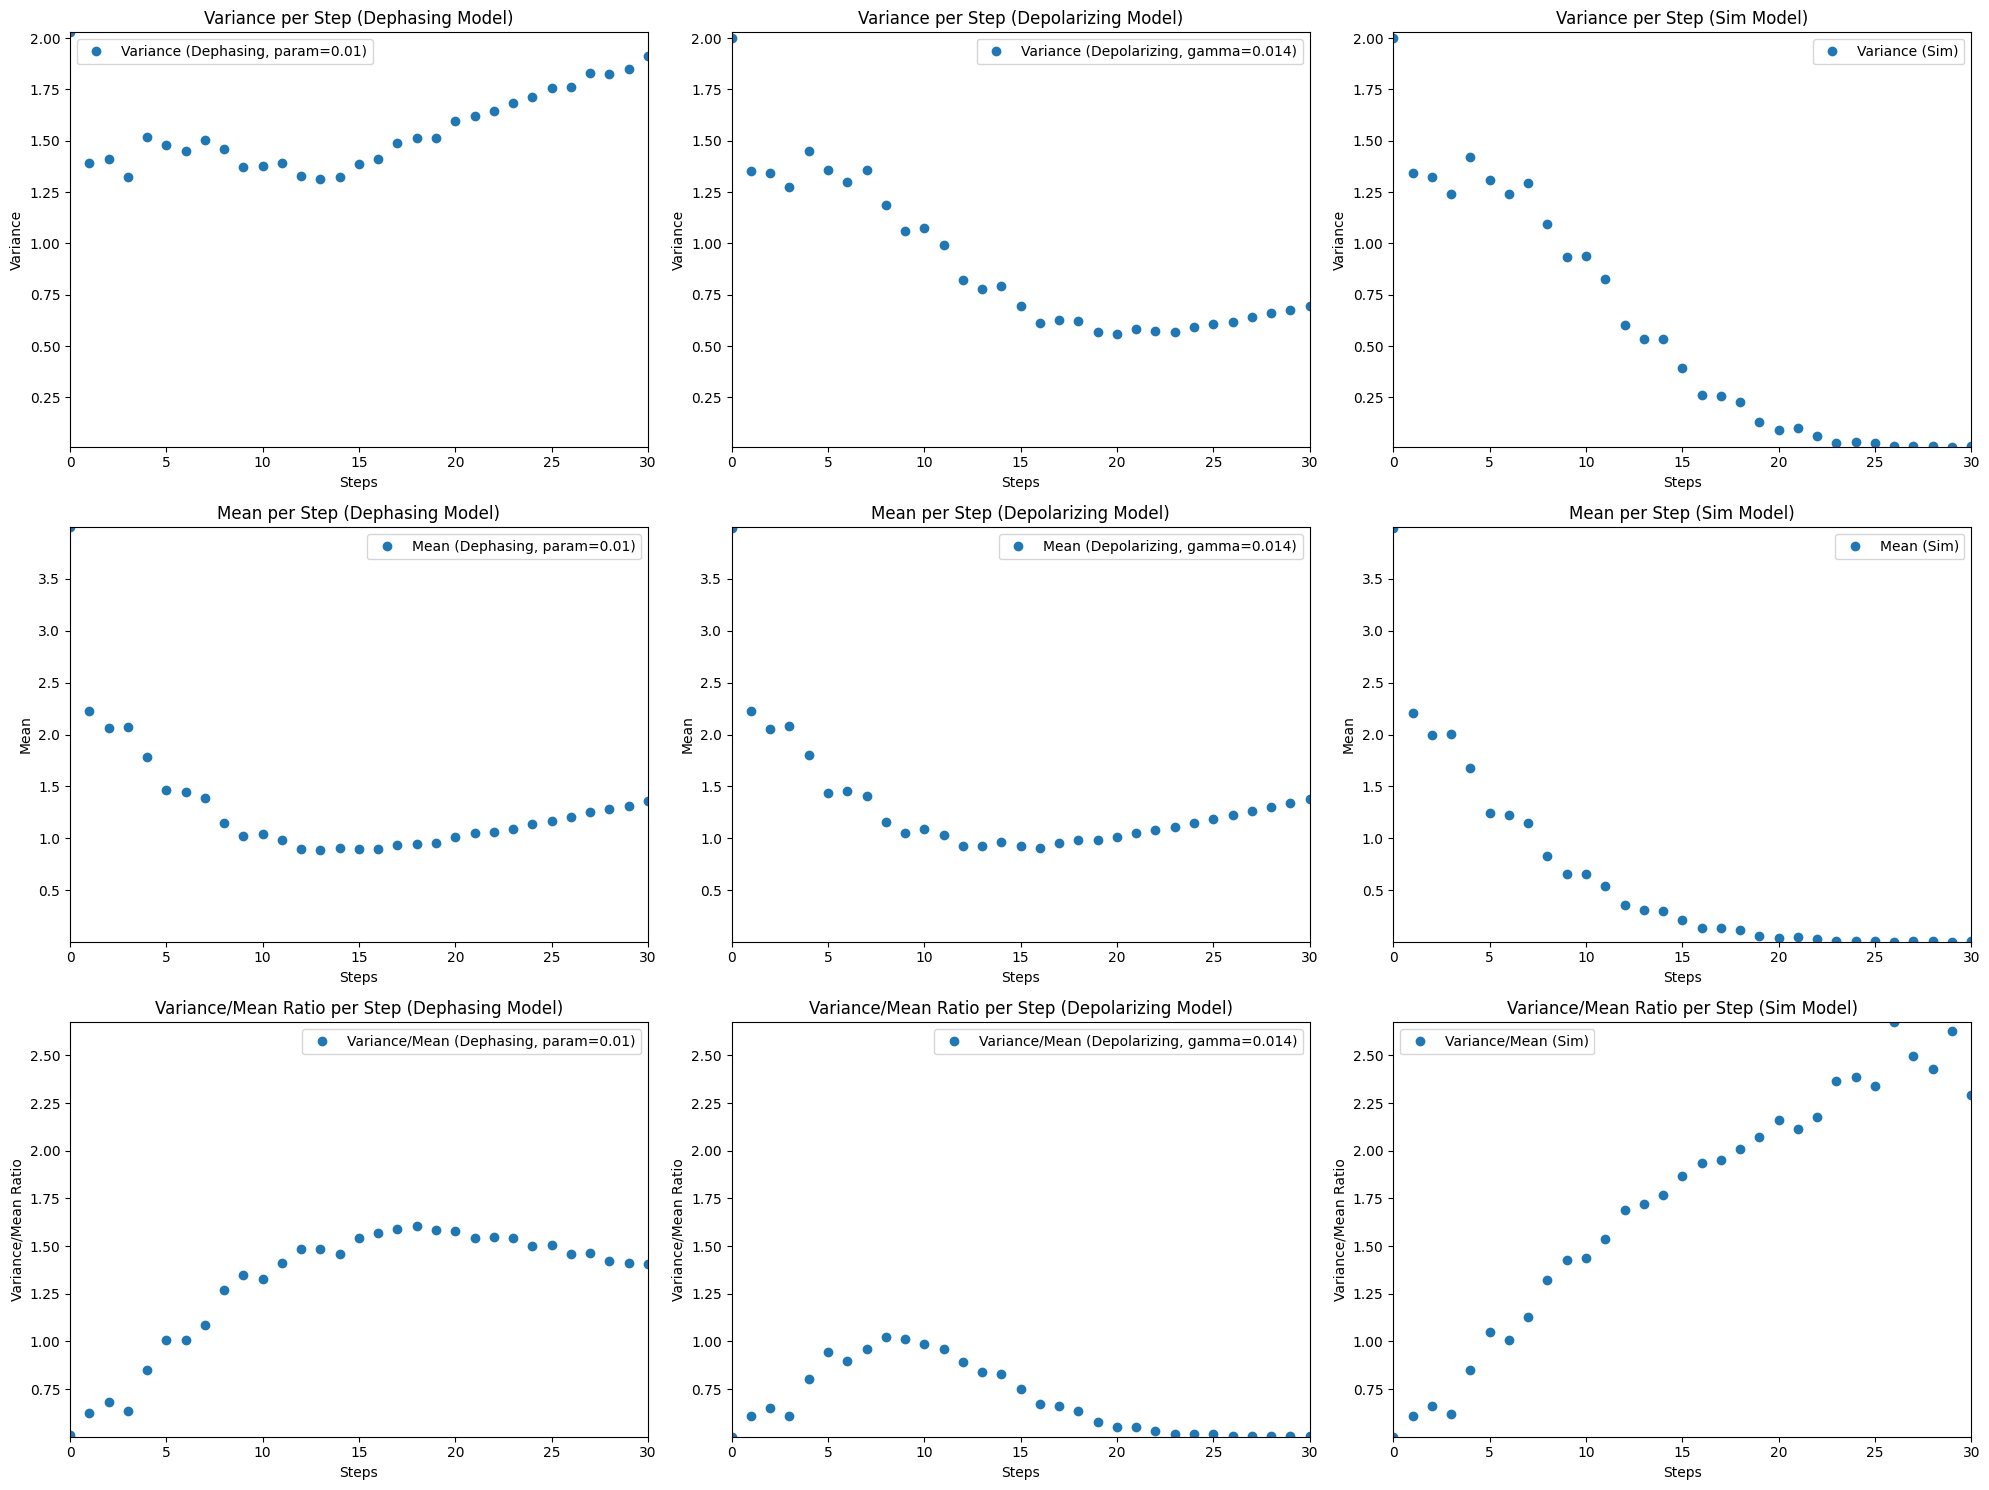

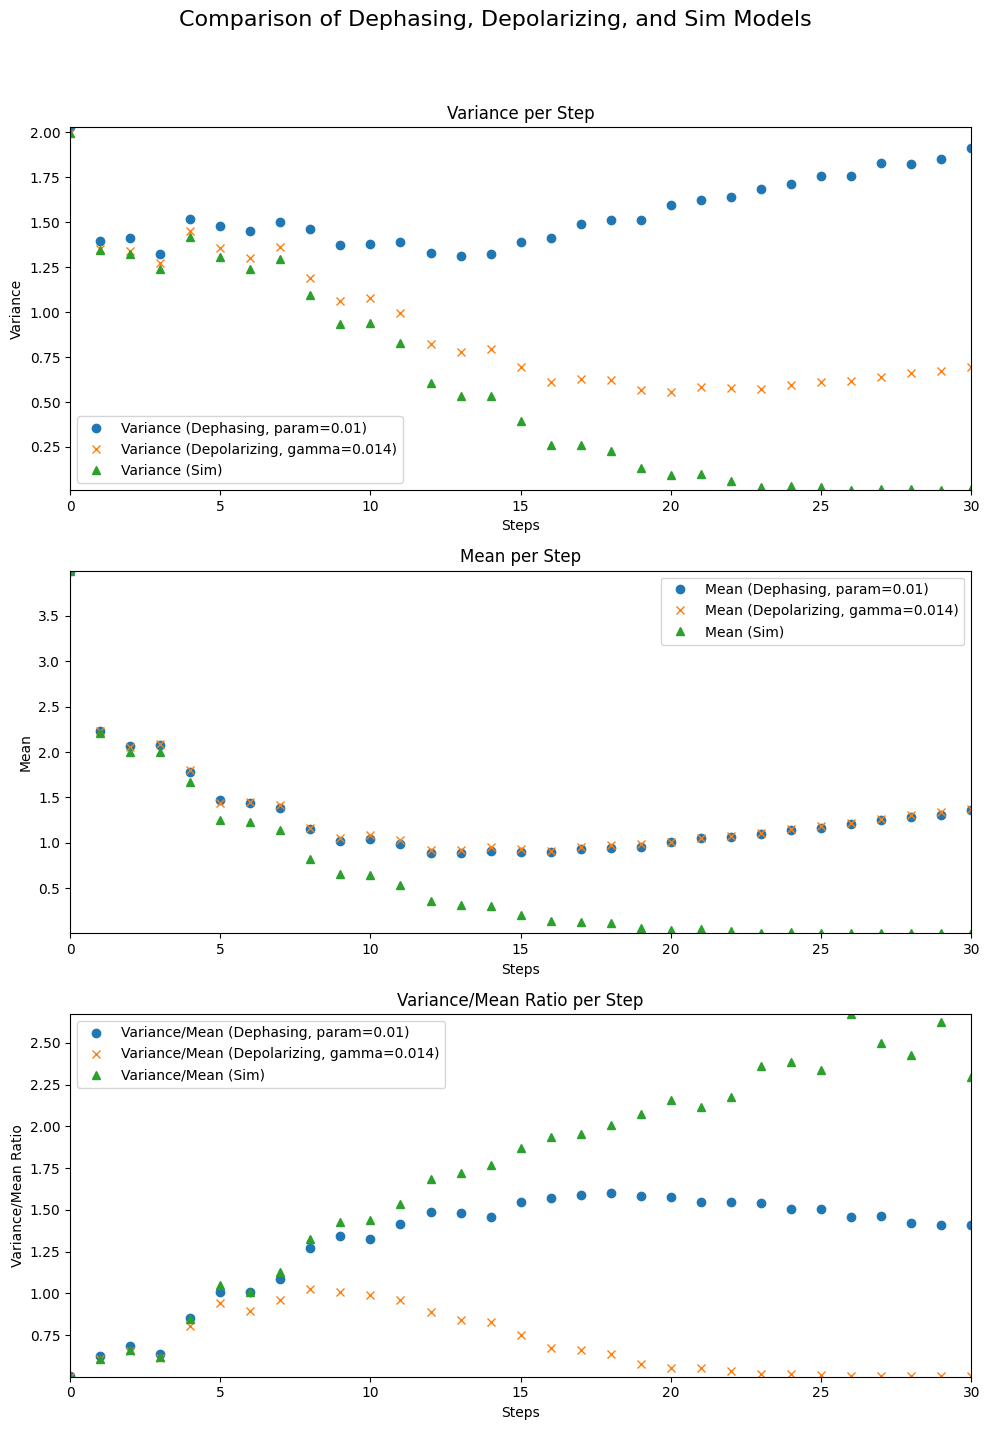

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming calc_kinks_probability, calc_kinks_mean, and calc_kinks_variance are defined elsewhere

# Calculate probabilities, means, variances, and ratios for the dephasing model
dephasing_param = 0.01
probs_dephasing = {s: calc_kinks_probability(d) for s, d in results_noisy_01.items()}
means_dephasing = {s: calc_kinks_mean(d) for s, d in probs_dephasing.items()}
variances_dephasing = {s: calc_kinks_variance(d) for s, d in probs_dephasing.items()}
ratios_dephasing = {s: variances_dephasing[s] / means_dephasing[s] for s in probs_dephasing.keys()}

# Calculate probabilities, means, variances, and ratios for the depolarizing model
gamma = 0.014
qubits = 8
exponential_decay = lambda steps, gamma: np.exp(-gamma * steps)

# Calculate probabilities, means, variances, and ratios for the sim data
probs_sim = {s: calc_kinks_probability(d) for s, d in results_sim1.items()}
means_sim = {s: calc_kinks_mean(d) for s, d in probs_sim.items()}
variances_sim = {s: calc_kinks_variance(d) for s, d in probs_sim.items()}
ratios_sim = {s: variances_sim[s] / means_sim[s] for s in probs_sim.keys()}

def depolarizing_error(gamma, probs, static_prob):
    return {s: (1 - exponential_decay(s, gamma)) * static_prob + exponential_decay(s, gamma) * p for s, p in probs.items()}

means_depolarizing = depolarizing_error(gamma, means_sim, qubits / 2)
variances_depolarizing = depolarizing_error(gamma, variances_sim, qubits / 4)
ratios_depolarizing = {s: variances_depolarizing[s] / means_depolarizing[s] for s in probs_dephasing.keys()}

# Determine common x and y limits
x_limits = [min(min(variances_dephasing.keys()), min(variances_depolarizing.keys())), 
            max(max(variances_dephasing.keys()), max(variances_depolarizing.keys()))]

y_limits_variance = [min(min(variances_dephasing.values()), min(variances_depolarizing.values()), min(variances_sim.values())), 
                     max(max(variances_dephasing.values()), max(variances_depolarizing.values()), max(variances_sim.values()))]

y_limits_mean = [min(min(means_dephasing.values()), min(means_depolarizing.values()), min(means_sim.values())), 
                 max(max(means_dephasing.values()), max(means_depolarizing.values()), max(means_sim.values()))]

y_limits_ratio = [min(min(ratios_dephasing.values()), min(ratios_depolarizing.values()), min(ratios_sim.values())), 
                  max(max(ratios_dephasing.values()), max(ratios_depolarizing.values()), max(ratios_sim.values()))]

# Create subplots for individual models
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

# Plot Variance for the dephasing model
axs[0, 0].plot(variances_dephasing.keys(), variances_dephasing.values(), 'o', label=f'Variance (Dephasing, param={dephasing_param})')
axs[0, 0].set_title('Variance per Step (Dephasing Model)')
axs[0, 0].set_xlabel('Steps')
axs[0, 0].set_ylabel('Variance')
axs[0, 0].set_xlim(x_limits)
axs[0, 0].set_ylim(y_limits_variance)
axs[0, 0].legend()

# Plot Variance for the depolarizing model
axs[0, 1].plot(variances_depolarizing.keys(), variances_depolarizing.values(), 'o', label=f'Variance (Depolarizing, gamma={gamma})')
axs[0, 1].set_title('Variance per Step (Depolarizing Model)')
axs[0, 1].set_xlabel('Steps')
axs[0, 1].set_ylabel('Variance')
axs[0, 1].set_xlim(x_limits)
axs[0, 1].set_ylim(y_limits_variance)
axs[0, 1].legend()

# Plot Variance for the sim model
axs[0, 2].plot(variances_sim.keys(), variances_sim.values(), 'o', label='Variance (Sim)')
axs[0, 2].set_title('Variance per Step (Sim Model)')
axs[0, 2].set_xlabel('Steps')
axs[0, 2].set_ylabel('Variance')
axs[0, 2].set_xlim(x_limits)
axs[0, 2].set_ylim(y_limits_variance)
axs[0, 2].legend()

# Plot Mean for the dephasing model
axs[1, 0].plot(means_dephasing.keys(), means_dephasing.values(), 'o', label=f'Mean (Dephasing, param={dephasing_param})')
axs[1, 0].set_title('Mean per Step (Dephasing Model)')
axs[1, 0].set_xlabel('Steps')
axs[1, 0].set_ylabel('Mean')
axs[1, 0].set_xlim(x_limits)
axs[1, 0].set_ylim(y_limits_mean)
axs[1, 0].legend()

# Plot Mean for the depolarizing model
axs[1, 1].plot(means_depolarizing.keys(), means_depolarizing.values(), 'o', label=f'Mean (Depolarizing, gamma={gamma})')
axs[1, 1].set_title('Mean per Step (Depolarizing Model)')
axs[1, 1].set_xlabel('Steps')
axs[1, 1].set_ylabel('Mean')
axs[1, 1].set_xlim(x_limits)
axs[1, 1].set_ylim(y_limits_mean)
axs[1, 1].legend()

# Plot Mean for the sim model
axs[1, 2].plot(means_sim.keys(), means_sim.values(), 'o', label='Mean (Sim)')
axs[1, 2].set_title('Mean per Step (Sim Model)')
axs[1, 2].set_xlabel('Steps')
axs[1, 2].set_ylabel('Mean')
axs[1, 2].set_xlim(x_limits)
axs[1, 2].set_ylim(y_limits_mean)
axs[1, 2].legend()

# Plot Variance/Mean Ratio for the dephasing model
axs[2, 0].plot(ratios_dephasing.keys(), ratios_dephasing.values(), 'o', label=f'Variance/Mean (Dephasing, param={dephasing_param})')
axs[2, 0].set_title('Variance/Mean Ratio per Step (Dephasing Model)')
axs[2, 0].set_xlabel('Steps')
axs[2, 0].set_ylabel('Variance/Mean Ratio')
axs[2, 0].set_xlim(x_limits)
axs[2, 0].set_ylim(y_limits_ratio)
axs[2, 0].legend()

# Plot Variance/Mean Ratio for the depolarizing model
axs[2, 1].plot(ratios_depolarizing.keys(), ratios_depolarizing.values(), 'o', label=f'Variance/Mean (Depolarizing, gamma={gamma})')
axs[2, 1].set_title('Variance/Mean Ratio per Step (Depolarizing Model)')
axs[2, 1].set_xlabel('Steps')
axs[2, 1].set_ylabel('Variance/Mean Ratio')
axs[2, 1].set_xlim(x_limits)
axs[2, 1].set_ylim(y_limits_ratio)
axs[2, 1].legend()

# Plot Variance/Mean Ratio for the sim model
axs[2, 2].plot(ratios_sim.keys(), ratios_sim.values(), 'o', label='Variance/Mean (Sim)')
axs[2, 2].set_title('Variance/Mean Ratio per Step (Sim Model)')
axs[2, 2].set_xlabel('Steps')
axs[2, 2].set_ylabel('Variance/Mean Ratio')
axs[2, 2].set_xlim(x_limits)
axs[2, 2].set_ylim(y_limits_ratio)
axs[2, 2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Create comparison plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Add a title to the whole figure
fig.suptitle('Comparison of Dephasing, Depolarizing, and Sim Models', fontsize=16)

# Plot Variance Comparison
axs[0].plot(variances_dephasing.keys(), variances_dephasing.values(), 'o', label=f'Variance (Dephasing, param={dephasing_param})')
axs[0].plot(variances_depolarizing.keys(), variances_depolarizing.values(), 'x', label=f'Variance (Depolarizing, gamma={gamma})')
axs[0].plot(variances_sim.keys(), variances_sim.values(), '^', label='Variance (Sim)')
axs[0].set_title('Variance per Step')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Variance')
axs[0].set_xlim(x_limits)
axs[0].set_ylim(y_limits_variance)
axs[0].legend()

# Plot Mean Comparison
axs[1].plot(means_dephasing.keys(), means_dephasing.values(), 'o', label=f'Mean (Dephasing, param={dephasing_param})')
axs[1].plot(means_depolarizing.keys(), means_depolarizing.values(), 'x', label=f'Mean (Depolarizing, gamma={gamma})')
axs[1].plot(means_sim.keys(), means_sim.values(), '^', label='Mean (Sim)')
axs[1].set_title('Mean per Step')
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Mean')
axs[1].set_xlim(x_limits)
axs[1].set_ylim(y_limits_mean)
axs[1].legend()

# Plot Variance/Mean Ratio Comparison
axs[2].plot(ratios_dephasing.keys(), ratios_dephasing.values(), 'o', label=f'Variance/Mean (Dephasing, param={dephasing_param})')
axs[2].plot(ratios_depolarizing.keys(), ratios_depolarizing.values(), 'x', label=f'Variance/Mean (Depolarizing, gamma={gamma})')
axs[2].plot(ratios_sim.keys(), ratios_sim.values(), '^', label='Variance/Mean (Sim)')
axs[2].set_title('Variance/Mean Ratio per Step')
axs[2].set_xlabel('Steps')
axs[2].set_ylabel('Variance/Mean Ratio')
axs[2].set_xlim(x_limits)
axs[2].set_ylim(y_limits_ratio)
axs[2].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()